# Собирање на податоците за станови во Скопје

In [230]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import csv
import io
import re

f = csv.writer(open(r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi.csv', 'w', encoding="utf-8"))
f.writerow(['Населба', 'Квадратура', 'Соби', 'Спрат', 'Лифт', 'Греење', 'Паркинг', 'Цена (EUR)', 'Линк'])



br = 0;
lift_count = 0
sprat_count = 0
gr_count = 0
p_count = 0
nema = False

for j in range(0,162): 
    #if br == 970:
     #   break;                 
  
    if( j == 0): 
        master_page = requests.get('https://imoti247.com/mk/prodava-stanovi/Skopje')
        print('https://imoti247.com/mk/prodava-stanovi/Skopje')
    else: 
        master_page = requests.get('https://imoti247.com/mk/prodava-stanovi/Skopje/p' + str(j+1))
        print('https://imoti247.com/mk/prodava-stanovi/Skopje/p' + str(j+1))
  # Create a BeautifulSoup object
    soup = BeautifulSoup(master_page.text, 'html.parser')

  # Pull all text from the BodyText div
    links_list = soup.find_all('a', href=True)

    flag = 1;
    cnt = 1
  
    for link in links_list:
        
      if link['href'].startswith("/mk/") and link['href'].endswith(".html"):
        
          if flag == 1:
            print ("Found the URL:", link['href'])
            flag = 0
            s = "https://imoti247.com" + str(link['href'])
            print(s)
            master_page1 = requests.get(s)
            soup1 = BeautifulSoup(master_page1.text, 'html.parser')
            boxes_list = soup1.find_all('div', {"id":"content"})

            if len(boxes_list[0].contents[1].contents) < 6:
              break;
            if len(boxes_list[0].contents[1].contents[6]) >= 11:
              link = s 
              naselba, kv, sobi, sprat, cena, lift, greenje, parking = "","","","","","","", ""
              

              sl = str(boxes_list[0].contents[1].contents[8].text)
              nc = str(boxes_list[0].contents[1].contents[1].text) 

              
              list1 = re.split(' |, |\n',nc)
              list2 = re.split(' |, |\n',sl)
              print("LIST1: " + str(list1))
              print("LIST2: " + str(list2))
              

              print(boxes_list[0].contents[1].contents[1].text) #naselba, cena
              print(boxes_list[0].contents[1].contents[8].text) #sprat, lift

              ind_n = list1.index("Скопје")
              print("Населба: " + str(list1[ind_n + 2]))
              try:
                ind_c = list1.index(str("eur"))
              except ValueError:
                try:
                  ind_c = list1.index(str("EUR"))
                  print(ind_c)
                except:
                    nema = True
                    continue
                    
              if (nema): 
                nema = False
                continue
                    
                        
                
                
              
              naselba = str(list1[ind_n + 2])
              if list1[ind_c + 1].isdigit() == False:
                continue
                    
              print("EUR: " + str(list1[ind_c + 1]))              
              cena = str(list1[ind_c + 1])

              if "Лифт" in sl: 
                lift_count += 1
                print("Лифт: " + str(1))
                lift = str(1)
              if "Спрат" in sl: 
                ind_s = list2.index(str("Спрат"))
                print("Спрат: " + str(list2[ind_s + 1]))
                if list2[ind_s + 1] != '-':
                  sprat_count += 1
                  if str(list2[ind_s + 1]) == 'приземје':
                      sprat = str(0)
                  else: 
                    sprat = str(list2[ind_s + 1])
              if "Греење" in sl: 
                gr_count += 1
                print("Греење: " + str(1))
                greenje = str(1)
              if "Паркинг" in sl: 
                p_count += 1
                print("Паркинг: " + str(1))
                parking = str(1)

              i = 0
              for b in boxes_list[0].contents[1].contents[6]:
                #print(str(i) + " " + str(b))
                
                if i == 3:
                  sqft = int(b.text[10:-2])
                  print("Површина: " + str(sqft))
                  kv = str(sqft)
                  if int(cena) < 2000 and int(cena) != 1:
                        c = int(cena)*int(kv)
                        cena = str(c)
                if i == 5:
                  bedrooms = int(b.text[4:])
                  print("Соби: " + str(bedrooms))
                  sobi = str(bedrooms)
                i += 1
                
              br +=1
              print("\nTotal:" + str(br))
              print("Sprat cnt: " + str(sprat_count))
              print("Lift cnt: " + str(lift_count))
              print("Greenje cnt: " + str(gr_count))
              print("Parking cnt: " + str(p_count) + "\n")
              
              print("Се зачувува: ")
              print(str([naselba, kv, sobi, sprat, lift, greenje, parking, cena, link]))
              f.writerow([naselba, kv, sobi, sprat, lift, greenje, parking, cena, link]) 
                
            else:
              link = s 
              naselba,  kv, sobi, sprat, cena, lift, greenje, parking = "","","","","","","", ""
              

              sl = str(boxes_list[0].contents[1].contents[13].text)
              nc = str(boxes_list[0].contents[1].contents[6].text) 
              
              
              list1 = re.split(' |, |\n',nc)
              list2 = re.split(' |, |\n',sl)
              print("LIST1: " + str(list1))
              print("LIST2: " + str(list2))

              print(boxes_list[0].contents[1].contents[6].text) #naselba, cena
              print(boxes_list[0].contents[1].contents[13].text) #sprat, lift


              ind_n = list1.index("Скопје")
              print("Населба: " + str(list1[ind_n + 2]))
              try:
                ind_c = list1.index(str("eur"))
              except ValueError:
                try:
                  ind_c = list1.index(str("EUR"))
                  print(ind_c)
                except:
                    nema = True
                    continue
                    
              if (nema): 
                nema = False
                continue
              naselba = str(list1[ind_n + 2])
              if list1[ind_c + 1].isdigit() == False:
                continue
              print("EUR: " + str(list1[ind_c + 1])) 
              cena = str(list1[ind_c + 1]) 
              

              if "Лифт" in sl: 
                lift_count += 1
                print("Лифт: " + str(1))
                lift = str(1)
              if "Спрат" in sl: 
                ind_s = list2.index(str("Спрат"))
                print("Спрат: " + str(list2[ind_s + 1]))
                if list2[ind_s + 1] != '-':
                  sprat_count += 1
                  if str(list2[ind_s + 1]) == 'приземје':
                      sprat = str(0)
                  else: 
                    sprat = str(list2[ind_s + 1])
                  
              if "Греење" in sl: 
                gr_count += 1
                greenje = str(1)
                print("Греење: " + str(1))
              if "Паркинг" in sl: 
                p_count += 1
                print("Паркинг: " + str(1))
                parking = str(1)
              
              i = 0
              for b in boxes_list[0].contents[1].contents[11]:
                #print(str(i) + " " + str(b))
                
                if i == 3:
                  sqft = int(b.text[10:-2])
                  print("Површина: " + str(sqft))
                  kv = str(sqft)
                  if int(cena) < 2000 and int(cena) != 1:
                        c = int(cena)*int(kv)
                        cena = str(c)
                if i == 5:
                  bedrooms = int(b.text[4:])
                  print("Соби: " + str(bedrooms))
                  sobi = str(bedrooms)
                i += 1
                
              br +=1
              print("\nTotal:" + str(br))
              print("Sprat cnt: " + str(sprat_count))
              print("Lift cnt: " + str(lift_count))
              print("Greenje cnt: " + str(gr_count))
              print("Parking cnt: " + str(p_count) + "\n")
              
              f.writerow([naselba,  kv, sobi, sprat, lift, greenje, parking, cena, link]) 
              print("Се зачувува: ")
              print(str([naselba, kv, sobi, sprat, lift, greenje, parking, cena, link]))
          else:
            flag = 1
            continue
  
  



https://imoti247.com/mk/prodava-stanovi/Skopje
Found the URL: /mk/Prodavam-stan-50361.html
https://imoti247.com/mk/Prodavam-stan-50361.html
LIST1: ['', '', 'Prodavam', 'stan', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'EUR', '30000', 'За', 'продавање', '', '']
LIST2: ['', '1-собен', 'Наместеност', 'Наместен', 'Спрат', '-', '']


Prodavam stan                                Скопје / К.Вода EUR 30000 За продавање



1-собен
Наместеност Наместен
Спрат -

Населба: К.Вода
38
EUR: 30000
Спрат: -
Површина: 35
Соби: 2

Total:1
Sprat cnt: 0
Lift cnt: 0
Greenje cnt: 0
Parking cnt: 0

Се зачувува: 
['К.Вода', '35', '2', '', '', '', '', '30000', 'https://imoti247.com/mk/Prodavam-stan-50361.html']
Found the URL: /mk/Prodavam-stan-50362.html
https://imoti247.com/mk/Prodavam-stan-50362.html
LIST1: ['', '', 'Prodavam', 'stan', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

LIST1: ['', '', 'Se', 'prodava', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', '', 'EUR', '0', 'За', 'продавање', '', '']
LIST2: ['', '1-собен', 'Спрат', '-', 'Лифт', 'Да', '']


Se prodava                                Скопје /  EUR 0 За продавање



1-собен
Спрат -
Лифт Да

Населба: 
38
EUR: 0
Лифт: 1
Спрат: -
Површина: 30
Соби: 1

Total:8
Sprat cnt: 4
Lift cnt: 2
Greenje cnt: 4
Parking cnt: 3

Се зачувува: 
['', '30', '1', '', '1', '', '', '0', 'https://imoti247.com/mk/Se-prodava-50343.html']
Found the URL: /mk/Se-prodavaat-garsonjeri-vo-Kisela-Voda-50312.html
https://imoti247.com/mk/Se-prodavaat-garsonjeri-vo-Kisela-Voda-50312.html
LIST1: ['', '', 'Se', 'prodavaat', 'garsonjeri', 'vo', 'Kisela', 'Voda', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'MKD', '1', 'За', 'продавање', '', '']
L

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Железара', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Железара', 'eur', '35000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '10', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Исток', '', '']


Продава Стан во  нас. Железара                                Скопје / Железара eur 35000 За продавање



Спрат 10 кат
Греење 
                                Градско парно Ориентација  Исток 

Населба: Железара
EUR: 35000
Спрат: 10
Греење: 1
Површина: 37
Соби: 2

Total:15
Sprat cnt: 8
Lift cnt: 5
Greenje cnt: 8
Parking cnt: 5

Се зачувува: 
['Железара', '37', '2', '10', '', '1', '', '35000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Железара-50210.html']
Found the URL: /mk/Prodavame-stan-157-m2-

LIST1: ['', '', 'Продавам', 'стан', 'во', 'Ново', 'Лисиче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Н.Лисиче', 'EUR', '74000', 'За', 'продавање', '', '']
LIST2: ['', '3-собен', 'Наместеност', 'Наместен', 'Спрат', '-', '']


Продавам стан во Ново Лисиче                                Скопје / Н.Лисиче EUR 74000 За продавање



3-собен
Наместеност Наместен
Спрат -

Населба: Н.Лисиче
41
EUR: 74000
Спрат: -
Површина: 82
Соби: 3

Total:24
Sprat cnt: 10
Lift cnt: 6
Greenje cnt: 10
Parking cnt: 5

Се зачувува: 
['Н.Лисиче', '82', '3', '', '', '', '', '74000', 'https://imoti247.com/mk/Продавам-стан-во-Ново-Лисиче-50285.html']
Found the URL: /mk/Продава-Станови-во-нас-Козле-50242.html
https://imoti247.com/mk/Продава-Станови-во-нас-Козле-50242.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Козле', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

https://imoti247.com/mk/prodava-stanovi/Skopje/p4
Found the URL: /mk/Продава-Станови-во-нас-Centar-50243.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-50243.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '81800', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '6', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 81800 За продавање



Спрат 6 кат
Греење 
                                Градско парно

Населба: Центар
EUR: 81800
Спрат: 6
Греење: 1
Површина: 54
Соби: 2

Total:33
Sprat cnt: 18
Lift cnt: 8
Greenje cnt: 17
Parking cnt: 6

Се зачувува: 
['Центар', '54', '2', '6', '', '1', '', '81800', 'h

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '76000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Север', '', '', 'Исток', '', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 76000 За продавање



Спрат 3 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Север   Исток 

Населба: Тафталиџе
EUR: 76000
Лифт: 1
Спрат: 3
Греење: 1
Паркинг: 1
Површина: 69
Соби: 0

Total:42
Sprat cnt: 24
Lift cnt: 11
Greenje cnt: 22
Parking cnt: 11

Се зачувува: 
['Тафталиџе', '69',

LIST1: ['', '', 'Stan', 'Gjorche', 'Petrov', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'EUR', '65000', 'За', 'продавање', '', '']
LIST2: ['', '3-собен', 'Наместеност', 'Полу-наместен', 'Спрат', '-', '']


Stan Gjorche Petrov                                 Скопје / Ѓ.Петров EUR 65000 За продавање



3-собен
Наместеност Полу-наместен
Спрат -

Населба: Ѓ.Петров
40
EUR: 65000
Спрат: -
Површина: 71
Соби: 3

Total:51
Sprat cnt: 30
Lift cnt: 13
Greenje cnt: 24
Parking cnt: 14

Се зачувува: 
['Ѓ.Петров', '71', '3', '', '', '', '', '65000', 'https://imoti247.com/mk/Stan-Gjorche-Petrov-50329.html']
Found the URL: /mk/Продава-Станови-во-нас-Аеродром-50003.html
https://imoti247.com/mk/Продава-Станови-во-нас-Аеродром-50003.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

LIST1: ['', '', 'продажба', 'на', 'стан', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'EUR', '41000', 'За', 'продавање', '', '']
LIST2: ['', '2-собен', 'Наместеност', 'Полу-наместен', 'Спрат', 'приземје', 'Состојба', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Стар', 'Подрум', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Нема', 'греење', 'Ориентација', '', 'Исток', '', '']


продажба на стан                                Скопје / К.Вода EUR 41000 За продавање



2-собен
Наместеност Полу-наместен
Спрат приземје
Состојба 
                                Стар
Подрум Да Греење 
                                Нема греење Ориентација  Исток 

Населба: К.Вода
39
EUR: 41000
Спрат: приземје
Греење: 1

https://imoti247.com/mk/prodava-stanovi/Skopje/p7
Found the URL: /mk/Продавам-гарсоњера-49946.html
https://imoti247.com/mk/Продавам-гарсоњера-49946.html
LIST1: ['', '', 'Продавам', 'гарсоњера', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'EUR', '43500', 'За', 'продавање', '', '']
LIST2: ['', 'Гарсоњера', 'Наместеност', 'Празен', 'Спрат', '-', '']


Продавам гарсоњера                                Скопје / Центар EUR 43500 За продавање



Гарсоњера
Наместеност Празен
Спрат -

Населба: Центар
38
EUR: 43500
Спрат: -
Површина: 36
Соби: 1

Total:67
Sprat cnt: 39
Lift cnt: 18
Greenje cnt: 29
Parking cnt: 18

Се зачувува: 
['Центар', '36', '1', '', '', '', '', '43500', 'https://imoti247.com/mk/Продавам-гарсоњера-49946.html']
Found the URL: /mk/Продава-Станови-во-нас-Карпош-3-49703.html
https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-3-49703.html
LIST1: ['', '', 'Продава', 'Стан', 'в

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Т.Поле', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Т.Поле', 'eur', '39000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. Т.Поле                                Скопје / Т.Поле eur 39000 За продавање



Спрат 2 кат
Греење 
                                Градско парно Ориентација  Југ  

Населба: Т.Поле
EUR: 39000
Спрат: 2
Греење: 1
Површина: 56
Соби: 2

Total:76
Sprat cnt: 45
Lift cnt: 20
Greenje cnt: 34
Parking cnt: 20

Се зачувува: 
['Т.Поле', '56', '2', '2', '', '1', '', '39000', 'https://imoti247.com/mk/Продава-Станови-во-нас-ТПоле-50282.html']
Found the URL: /mk/Продава-Станови-во-нас-ЃПетров-48996

LIST1: ['', '', 'Prodavam', 'stan', 'vo', 'Cento', '53m2', 'so', 'podrum', '26', '000', 'EUR', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Сингелиќ', 'EUR', '26000', 'За', 'продавање', '', '']
LIST2: ['', '']


Prodavam stan vo Cento 53m2 so podrum, 26 000 EUR                                Скопје / Сингелиќ EUR 26000 За продавање




Населба: Сингелиќ
11
Found the URL: /mk/Се-продава-стан-64м2-Тафталиџе-48742.html
https://imoti247.com/mk/Се-продава-стан-64м2-Тафталиџе-48742.html
LIST1: ['', '', 'Се', 'продава', 'стан', '64м2', 'Тафталиџе', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'EUR', '1100', 'За', 'продавање', '', '']
LIST2: ['', '3-собен', 'Наместеност', 'Празен', 'Спрат', '-', '']


Се продава стан 64м2 Тафталиџе                                Скопје / Тафталиџе 1 EUR 110

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '3', 'eur', '150000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '6', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. Карпош 3                                Скопје / Карпош 3 eur 150000 За продавање



Спрат 6 кат
Лифт Да Греење 
                                Сопствено парно Ориентација  Југ  Исток 

Населба: Карпош
EUR: 150000
Лифт: 1
Спрат: 6
Греење: 1
Површина: 173
Соби: 3

Total:92
Sprat cnt: 53
Lift cnt: 24
Greenje cnt: 40
Parking cnt: 24

Се зачувува: 
['Карпош', '173', '3', '6', '1', '1', '', '150000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Карп

https://imoti247.com/mk/prodava-stanovi/Skopje/p10
Found the URL: /mk/Продавам-стан-83-м2-Водњанска-Центар-49602.html
https://imoti247.com/mk/Продавам-стан-83-м2-Водњанска-Центар-49602.html
LIST1: ['', '', 'Продавам', 'стан', '83', 'м2', '-', 'Водњанска', '-', 'Центар', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'EUR', '80000', 'За', 'продавање', '', '']
LIST2: ['', '3-собен', 'Наместеност', 'Празен', 'Спрат', '-', '']


Продавам стан 83 м2 - Водњанска - Центар                                Скопје / Центар EUR 80000 За продавање



3-собен
Наместеност Празен
Спрат -

Населба: Центар
44
EUR: 80000
Спрат: -
Површина: 83
Соби: 3

Total:100
Sprat cnt: 59
Lift cnt: 26
Greenje cnt: 45
Parking cnt: 26

Се зачувува: 
['Центар', '83', '3', '', '', '', '', '80000', 'https://imoti247.com/mk/Продавам-стан-83-м2-Водњанска-Центар-49602.html']
Found the URL: /mk/Продава-Станови-во-нас-Карпош-2-4

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '3', 'eur', '130000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Карпош 3                                Скопје / Карпош 3 eur 130000 За продавање



Спрат 2 кат
Лифт Да Греење 
                                Градско парно

Населба: Карпош
EUR: 130000
Лифт: 1
Спрат: 2
Греење: 1
Површина: 113
Соби: 3

Total:109
Sprat cnt: 64
Lift cnt: 31
Greenje cnt: 49
Parking cnt: 28

Се зачувува: 
['Карпош', '113', '3', '2', '1', '1', '', '130000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-3-49526.html']
Found the URL: /mk/Продава-Станови-во-нас-Карпош-3-49

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Бутел', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Бутел', '1', 'eur', '27000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', '']


Продава Стан во  нас. Бутел 1                                Скопје / Бутел 1 eur 27000 За продавање



Спрат приземје

Населба: Бутел
EUR: 27000
Спрат: приземје
Површина: 42
Соби: 0

Total:116
Sprat cnt: 70
Lift cnt: 33
Greenje cnt: 53
Parking cnt: 29

Се зачувува: 
['Бутел', '42', '0', '0', '', '', '', '27000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Бутел-1-49618.html']
Found the URL: /mk/Продава-Станови-во-нас-Карпош-3-50055.html
https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-3-50055.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Н.Лисиче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Н.Лисиче', 'eur', '44000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '7', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Запад', '']


Продава Стан во  нас. Н.Лисиче                                Скопје / Н.Лисиче eur 44000 За продавање



Спрат 7 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Запад

Населба: Н.Лисиче
EUR: 44000
Лифт: 1
Спрат: 7
Греење: 1
Паркинг: 1
Површина: 42
Соби: 2

Total:125
Sprat cnt: 79
Lift cnt: 38
Greenje cnt: 60
Parking cnt: 31

Се зачувува: 
['Н.Лисиче', '42', '2', '7', '1', '1', '1', '44000', 'https://imoti

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Влае', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Влае', 'eur', '70000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Влае                                Скопје / Влае eur 70000 За продавање



Спрат 1 кат
Греење 
                                Сопствено парно

Населба: Влае
EUR: 70000
Спрат: 1
Греење: 1
Површина: 80
Соби: 3

Total:132
Sprat cnt: 84
Lift cnt: 39
Greenje cnt: 63
Parking cnt: 32

Се зачувува: 
['Влае', '80', '3', '1', '', '1', '', '70000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Влае-48940.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-49873.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-49

https://imoti247.com/mk/prodava-stanovi/Skopje/p14
Found the URL: /mk/Продава-Станови-во-нас-Црниче-46716.html
https://imoti247.com/mk/Продава-Станови-во-нас-Црниче-46716.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '68900', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 68900 За продавање



Спрат 3 кат
Греење 
                                Сопствено парно

Населба: Црниче
EUR: 68900
Спрат: 3
Греење: 1
Површина: 55
Соби: 0

Total:140
Sprat cnt: 90
Lift cnt: 41
Greenje cnt: 67
Parking cnt: 33

Се зачувува: 
['Црниче', '55', '0', '3', '', '1', '', '68

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Паркинг', 'Јавен', 'паркинг', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 1 За продавање



Спрат 4 кат
Паркинг Јавен паркинг 

Населба: К.Вода
EUR: 1
Спрат: 4
Паркинг: 1
Површина: 59
Соби: 2

Total:148
Sprat cnt: 98
Lift cnt: 42
Greenje cnt: 73
Parking cnt: 34

Се зачувува: 
['К.Вода', '59', '2', '4', '', '', '1', '1', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-50156.html']
Found the URL: /mk/СЕ-ИЗДАВА-СТАН-ВО-ЃОРЧЕ-ПЕТРОВ-50142.html
https://imoti247.com/mk/СЕ-ИЗДАВА-СТАН-ВО-ЃОРЧЕ-ПЕТРОВ-50142.html
LIST1: ['', '', 'СЕ', 'ИЗДАВА', 'СТАН', 'ВО', 'ЃОРЧЕ', 'ПЕТРОВ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

LIST1: ['', '', '', 'СЕ', 'ИЗДАВА', 'ГАРСОНИЕРА', '', 'ВО', 'КОЗЛЕ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Козле', 'MKD', '6200', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '-', '']


 СЕ ИЗДАВА ГАРСОНИЕРА  ВО КОЗЛЕ                                Скопје / Козле MKD 6200 За продавање



Спрат -

Населба: Козле
Found the URL: /mk/Продава-Станови-во-нас-Аеродром-48666.html
https://imoti247.com/mk/Продава-Станови-во-нас-Аеродром-48666.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствен

LIST1: ['', '', 'prodavam', '', 'prekrasen', 'satan', 'vo', 'n.', 'Hipodrom', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Хиподром', 'MKD', '45350', 'За', 'продавање', '', '']
LIST2: ['', '3-собен', 'Наместеност', 'Полу-наместен', 'Спрат', '-', '']


prodavam  prekrasen satan vo n. Hipodrom                                Скопје / Хиподром MKD 45350 За продавање



3-собен
Наместеност Полу-наместен
Спрат -

Населба: Хиподром
Found the URL: /mk/Продава-Станови-во-нас-Трнодол-49424.html
https://imoti247.com/mk/Продава-Станови-во-нас-Трнодол-49424.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Трнодол', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Трнодол', 'eur', '120750', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'eur', '29000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '5', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. Аеродром                                Скопје / Аеродром eur 29000 За продавање



Спрат 5 кат
Лифт Да Греење 
                                Градско парно Ориентација  Југ  

Населба: Аеродром
EUR: 29000
Лифт: 1
Спрат: 5
Греење: 1
Површина: 32
Соби: 1

Total:169
Sprat cnt: 111
Lift cnt: 48
Greenje cnt: 81
Parking cnt: 38

Се зачувува: 
['Аеродром', '32', '1', '5', '1', '1', '', '29000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Аеродром-44593.html']
Found t

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '35000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '7', 'кат', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 35000 За продавање



Спрат 7 кат

Населба: Ѓ.Петров
EUR: 35000
Спрат: 7
Површина: 40
Соби: 0

Total:178
Sprat cnt: 118
Lift cnt: 49
Greenje cnt: 85
Parking cnt: 39

Се зачувува: 
['Ѓ.Петров', '40', '0', '7', '', '', '', '35000', 'https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-50036.html']
Found the URL: /mk/Продава-Станови-во-нас-Козле-50025.html
https://imoti247.com/mk/Продава-Станови-во-нас-Козле-50025.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Козле', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', 

https://imoti247.com/mk/prodava-stanovi/Skopje/p19
Found the URL: /mk/PRODAVAM-продавам-стан-во-Кисела-Вода-Чешма-42651.html
https://imoti247.com/mk/PRODAVAM-продавам-стан-во-Кисела-Вода-Чешма-42651.html
LIST1: ['', '', 'PRODAVAM', '-', 'продавам', 'стан', 'во', 'Кисела', 'Вода', '-', 'Чешма', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'EUR', '7000', 'За', 'продавање', '', '']
LIST2: ['', '3-собен', 'Наместеност', 'Наместен', 'Спрат', '-', '']


PRODAVAM - продавам стан во Кисела Вода - Чешма                                Скопје / К.Вода EUR 7000 За продавање



3-собен
Наместеност Наместен
Спрат -

Населба: К.Вода
45
EUR: 7000
Спрат: -
Површина: 71
Соби: 3

Total:187
Sprat cnt: 125
Lift cnt: 51
Greenje cnt: 91
Parking cnt: 40

Се зачувува: 
['К.Вода', '71', '3', '', '', '', '', '7000', 'https://imoti247.com/mk/PRODAVAM-продавам-стан-во-Кисела-Вода-Чешма-42651.html']
Found the URL

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Водно', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Водно', 'eur', '185000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Водно                                Скопје / Водно eur 185000 За продавање



Спрат 3 кат
Греење 
                                Градско парно

Населба: Водно
EUR: 185000
Спрат: 3
Греење: 1
Површина: 185
Соби: 4

Total:195
Sprat cnt: 132
Lift cnt: 52
Greenje cnt: 95
Parking cnt: 44

Се зачувува: 
['Водно', '185', '4', '3', '', '1', '', '185000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Водно-48960.html']
Found the URL: /mk/Продава-Станови-во-нас-Аеродром-48956.html
https://imoti247.com/mk/Продава-Станови-во-н

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '90000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Паркинг', 'Гаража', '', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 90000 За продавање



Спрат 2 кат
Паркинг Гаража 

Населба: Црниче
EUR: 90000
Спрат: 2
Паркинг: 1
Површина: 61
Соби: 3

Total:204
Sprat cnt: 141
Lift cnt: 52
Greenje cnt: 98
Parking cnt: 47

Се зачувува: 
['Црниче', '61', '3', '2', '', '', '1', '90000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Црниче-48932.html']
Found the URL: /mk/Продава-Станови-во-нас-НЛисиче-48910.html
https://imoti247.com/mk/Продава-Станови-во-нас-НЛисиче-48910.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Н.Лисиче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Н.Лисиче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Н.Лисиче', 'eur', '75100', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Исток', '', '']


Продава Стан во  нас. Н.Лисиче                                Скопје / Н.Лисиче eur 75100 За продавање



Спрат 4 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Исток 

Населба: Н.Лисиче
EUR: 75100
Лифт: 1
Спрат: 4
Греење: 1
Паркинг: 1
Површина: 80
Соби: 3

Total:213
Sprat cnt: 150
Lift cnt: 54
Greenje cnt: 103
Parking cnt: 48

Се зачувува: 
['Н.Лисиче', '80', '3', '4', '1', '1', '1', '75100', 'https:

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '122400', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Ориентација', '', 'Север', '', 'Југ', '', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 122400 За продавање



Спрат 3 кат
Ориентација  Север  Југ  

Населба: Центар
EUR: 122400
Спрат: 3
Површина: 120
Соби: 4

Total:221
Sprat cnt: 158
Lift cnt: 56
Greenje cnt: 109
Parking cnt: 49

Се зачувува: 
['Центар', '120', '4', '3', '', '', '', '122400', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-48835.html']
Found the URL: /mk/Продава-Станови-во-нас-Црниче-48826.html
https://imoti247.com/mk/Продава-Станови-во-нас-Црниче-48826.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Водно', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Водно', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. Водно                                Скопје / Водно eur 1 За продавање



Спрат 4 кат
Греење 
                                Сопствено парно Ориентација  Југ  Исток 

Населба: Водно
EUR: 1
Спрат: 4
Греење: 1
Површина: 171
Соби: 4

Total:230
Sprat cnt: 167
Lift cnt: 56
Greenje cnt: 116
Parking cnt: 50

Се зачувува: 
['Водно', '171', '4', '4', '', '1', '', '1', 'https://imoti247.com/mk/Продава-Станови-во-нас-Водно-48810.html']
Found the URL: /mk/Se-prodava-Stan-vo-cair-38069.html

LIST1: ['', '', 'SE', 'PRODAVA', 'NOV', 'STAN', '57m2', 'VO', 'KARPOS', '4', 'NA', '4ti', 'KAT', 'SO', 'DVE', 'SPALNI', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '4', 'EUR', '1050', 'За', 'продавање', '', '']
LIST2: ['', '']


SE PRODAVA NOV STAN 57m2 VO KARPOS 4 NA 4ti KAT SO DVE SPALNI                                Скопје / Карпош 4 EUR 1050 За продавање




Населба: Карпош
51
EUR: 1050
Површина: 57
Соби: 3

Total:239
Sprat cnt: 174
Lift cnt: 59
Greenje cnt: 119
Parking cnt: 53

Се зачувува: 
['Карпош', '57', '3', '', '', '', '', '59850', 'https://imoti247.com/mk/SE-PRODAVA-NOV-STAN-57m2-VO-KARPOS-4-NA-4ti-KAT-SO-DVE-SPALNI-42545.html']
Found the URL: /mk/SE-PRODAVA-STAN-105m2-NA-VODNO-PANORAMA-RESIDENCE-42543.html
https://imoti247.com/mk/SE-PRODAVA-STAN-105m2-NA-VODNO-PANORAMA-RESIDENCE-42543.html
LIST1: ['', '', 'SE', 'PRODAVA', 'STAN', '105m2', 'NA', 'VODNO-PANORAMA', 'RESID

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '70000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Ориентација', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 70000 За продавање



Спрат приземје
Ориентација  Исток  Запад

Населба: К.Вода
EUR: 70000
Спрат: приземје
Површина: 71
Соби: 4

Total:247
Sprat cnt: 178
Lift cnt: 59
Greenje cnt: 120
Parking cnt: 54

Се зачувува: 
['К.Вода', '71', '4', '0', '', '', '', '70000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-48515.html']
Found the URL: /mk/Продава-Станови-во-нас-Аеродром-48511.html
https://imoti247.com/mk/Продава-Станови-во-нас-Аеродром-48511.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

LIST1: ['', '', 'Ekstra', 'povolno!!!', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'EUR', '73000', 'За', 'продавање', '', '']
LIST2: ['', '4-собен', 'Наместеност', 'Празен', 'Спрат', '-', '']


Ekstra povolno!!!                                 Скопје / К.Вода EUR 73000 За продавање



4-собен
Наместеност Празен
Спрат -

Населба: К.Вода
39
EUR: 73000
Спрат: -
Површина: 86
Соби: 4

Total:256
Sprat cnt: 184
Lift cnt: 61
Greenje cnt: 124
Parking cnt: 56

Се зачувува: 
['К.Вода', '86', '4', '', '', '', '', '73000', 'https://imoti247.com/mk/Ekstra-povolno-48293.html']
Found the URL: /mk/НОВОГРАДБА-ДИРЕКТНО-ОД-ИНВЕСТИТОР-26134.html
https://imoti247.com/mk/НОВОГРАДБА-ДИРЕКТНО-ОД-ИНВЕСТИТОР-26134.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p29
Found the URL: /mk/SE-PRODAVA-NOV-STAN-70m2-DEBAR-MAALO-2-kat-48259.html
https://imoti247.com/mk/SE-PRODAVA-NOV-STAN-70m2-DEBAR-MAALO-2-k

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '146000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '5', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 146000 За продавање



Спрат 5 кат
Греење 
                                Градско парно Ориентација  Југ  

Населба: Тафталиџе
EUR: 146000
Спрат: 5
Греење: 1
Површина: 113
Соби: 0

Total:261
Sprat cnt: 188
Lift cnt: 62
Greenje cnt: 127
Parking cnt: 58

Се зачувува: 
['Тафталиџе', '113', '0', '5', '', '1', '', '146000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-1-49857.html']
Found th

LIST1: ['', '', 'СЕ', 'ПРОДАВА', 'СТАН', 'ВО', 'НАСЕЛБА', 'АЕРОДРОМ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'MKD', '0', 'За', 'продавање', '', '']
LIST2: ['', '2-собен', 'Наместеност', 'Празен', 'Спрат', '-', '']


СЕ ПРОДАВА СТАН ВО НАСЕЛБА АЕРОДРОМ                                Скопје / Аеродром MKD 0 За продавање



2-собен
Наместеност Празен
Спрат -

Населба: Аеродром
Found the URL: /mk/Stan-od-84m2-vo-Bunjakovec-48119.html
https://imoti247.com/mk/Stan-od-84m2-vo-Bunjakovec-48119.html
LIST1: ['', '', 'Stan', 'od', '84m2', 'vo', 'Bunjakovec', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'EUR', '85000', 'За', 'продавање', '', '']
LIST2: ['', '4-собен', 'Спрат', '-', '']


Stan od 84m2 vo Bunjakovec                                Скопје / Центар EUR 85000 За продавање




LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '130000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '10', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Север', '', 'Југ', '', '', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 130000 За продавање



Спрат 10 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Север  Југ  

Населба: Тафталиџе
EUR: 130000
Лифт: 1
Спрат: 10
Греење: 1
Паркинг: 1
Површина: 159
Соби: 4

Total:276
Sprat cnt: 199
Lift cnt: 68
Greenje cnt: 138
Parking cnt: 66

Се зачувува: 
['Тафталиџе',

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '119000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Гаража', 'Да', '', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', 'Југ', '', '', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 119000 За продавање



Спрат 3 кат
Гаража Да  Греење 
                                Сопствено парно Паркинг Гаража  Ориентација  Север  Југ  

Населба: Црниче
EUR: 119000
Спрат: 3
Греење: 1
Паркинг: 1
Површина: 130
Соби: 4

Total:284
Sprat cnt: 207
Lift cnt: 72
Greenje cnt: 144
Parking cnt: 68

Се зачувува: 
['Црниче', '130', '4', '3', '', '1', '1', '119000', 'http

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Водно', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Водно', 'eur', '270000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Водно                                Скопје / Водно eur 270000 За продавање



Спрат 1 кат
Лифт Да Греење 
                                Сопствено парно

Населба: Водно
EUR: 270000
Лифт: 1
Спрат: 1
Греење: 1
Површина: 200
Соби: 5

Total:292
Sprat cnt: 215
Lift cnt: 77
Greenje cnt: 149
Parking cnt: 73

Се зачувува: 
['Водно', '200', '5', '1', '1', '1', '', '270000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Водно-46784.html']
Found the URL: /mk/Продава-Станови-во-нас-Автокоманда-46782.html
https

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '3', 'eur', '87000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '8', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', 'Југ', '', '', 'Запад', '']


Продава Стан во  нас. Карпош 3                                Скопје / Карпош 3 eur 87000 За продавање



Спрат 8 кат
Гаража Да  Лифт Да Греење 
                                Градско парно Паркинг Гаража  Ориентација  Север  Југ   Запад

Населба: Карпош
EUR: 87000
Лифт: 1
Спрат: 8
Греење: 1
Паркинг: 1
Површина: 98
Соби: 4

Total:300
Sprat cnt: 223
Lift cnt: 80
Greenje cnt: 155
Parking cnt: 75

Се зачувува: 
['Карп

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '2', 'eur', '50200', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Ориентација', '', 'Север', '', '', '', '']


Продава Стан во  нас. Карпош 2                                Скопје / Карпош 2 eur 50200 За продавање



Спрат 1 кат
Лифт Да Греење 
                                Сопствено парно Ориентација  Север   

Населба: Карпош
EUR: 50200
Лифт: 1
Спрат: 1
Греење: 1
Површина: 41
Соби: 2

Total:308
Sprat cnt: 231
Lift cnt: 86
Greenje cnt: 163
Parking cnt: 77

Се зачувува: 
['Карпош', '41', '2', '1', '1', '1', '', '50200', 'https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-2-4647

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '52500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Исток', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 52500 За продавање



Спрат 2 кат
Греење 
                                Градско парно Ориентација  Исток 

Населба: К.Вода
EUR: 52500
Спрат: 2
Греење: 1
Површина: 55
Соби: 2

Total:316
Sprat cnt: 239
Lift cnt: 92
Greenje cnt: 171
Parking cnt: 77

Се зачувува: 
['К.Вода', '55', '2', '2', '', '1', '', '52500', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-45195.html']
Found the URL: /mk/Продава-Станови-во-нас-Водно-45140

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '73500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Ориентација', '', 'Север', '', 'Југ', '', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 73500 За продавање



Спрат 4 кат
Греење 
                                Сопствено парно Ориентација  Север  Југ  

Населба: Центар
EUR: 73500
Спрат: 4
Греење: 1
Површина: 98
Соби: 3

Total:324
Sprat cnt: 247
Lift cnt: 94
Greenje cnt: 178
Parking cnt: 78

Се зачувува: 
['Центар', '98', '3', '4', '', '1', '', '73500', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44956.html']
Found the URL: /mk/Продава-

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '130000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 130000 За продавање



Спрат 4 кат
Лифт Да Греење 
                                Градско парно

Населба: Центар
EUR: 130000
Лифт: 1
Спрат: 4
Греење: 1
Површина: 112
Соби: 5

Total:333
Sprat cnt: 256
Lift cnt: 96
Greenje cnt: 184
Parking cnt: 79

Се зачувува: 
['Центар', '112', '5', '4', '1', '1', '', '130000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44810.html']
https://imoti247.com/mk/prodava-stanovi/Skopje/p36
Found the URL: /

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Жданец', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Жданец', 'eur', '190000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Ориентација', '', 'Север', '', 'Југ', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Жданец                                Скопје / Жданец eur 190000 За продавање



Спрат 2 кат
Ориентација  Север  Југ  Исток  Запад

Населба: Жданец
EUR: 190000
Спрат: 2
Површина: 190
Соби: 4

Total:341
Sprat cnt: 264
Lift cnt: 98
Greenje cnt: 189
Parking cnt: 79

Се зачувува: 
['Жданец', '190', '4', '2', '', '', '', '190000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Жданец-44594.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-44565.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44565.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', ''

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '117000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 117000 За продавање



Спрат 1 кат
Лифт Да Греење 
                                Сопствено парно Паркинг Гаража  Ориентација  Север   Исток  Запад

Населба: Црниче
EUR: 117000
Лифт: 1
Спрат: 1
Греење: 1
Паркинг: 1
Површина: 111
Соби: 4

Total:349
Sprat cnt: 272
Lift cnt: 101
Greenje cnt: 195
Parking cnt: 80

Се зачувува: 
['Црниче', '111', '4', '1', '1', '1', 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '82800', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 82800 За продавање



Спрат 2 кат
Греење 
                                Градско парно Ориентација  Југ  

Населба: Центар
EUR: 82800
Спрат: 2
Греење: 1
Површина: 69
Соби: 3

Total:357
Sprat cnt: 280
Lift cnt: 102
Greenje cnt: 201
Parking cnt: 80

Се зачувува: 
['Центар', '69', '3', '2', '', '1', '', '82800', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44267.html']
https://imoti247.com/mk/prodava-stanovi/Skopje/p38

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '72000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 72000 За продавање



Спрат приземје
Греење 
                                Градско парно

Населба: К.Вода
EUR: 72000
Спрат: приземје
Греење: 1
Површина: 70
Соби: 3

Total:365
Sprat cnt: 288
Lift cnt: 105
Greenje cnt: 208
Parking cnt: 83

Се зачувува: 
['К.Вода', '70', '3', '0', '', '1', '', '72000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-44095.html']
Found the URL: /mk/Продава-Станови-во-нас-Злокуќани-44034.html
https://imoti247.com/mk/Продава

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '51000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Север', '', '', 'Исток', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 51000 За продавање



Спрат 1 кат
Лифт Да Греење 
                                Градско парно Ориентација  Север   Исток 

Населба: К.Вода
EUR: 51000
Лифт: 1
Спрат: 1
Греење: 1
Површина: 51
Соби: 2

Total:374
Sprat cnt: 296
Lift cnt: 108
Greenje cnt: 213
Parking cnt: 84

Се зачувува: 
['К.Вода', '51', '2', '1', '1', '1', '', '51000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-43894.htm

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '51000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 51000 За продавање



Спрат 1 кат

Населба: К.Вода
EUR: 51000
Спрат: 1
Површина: 52
Соби: 3

Total:383
Sprat cnt: 305
Lift cnt: 109
Greenje cnt: 217
Parking cnt: 85

Се зачувува: 
['К.Вода', '52', '3', '1', '', '', '', '51000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-43839.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-43829.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-43829.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Цен

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '133000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Север', '', 'Југ', '', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 133000 За продавање



Спрат 4 кат
Лифт Да Греење 
                                Сопствено парно Паркинг Јавен паркинг  Ориентација  Север  Југ  

Населба: Центар
EUR: 133000
Лифт: 1
Спрат: 4
Греење: 1
Паркинг: 1
Површина: 115
Соби: 4

Total:391
Sprat cnt: 312
Lift cnt: 114
Greenje cnt: 225
Parking cnt: 87

Се зачувува: 
['Центар', '115', '4', '4', '1', '1', '1

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '91000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 91000 За продавање



Спрат приземје
Греење 
                                Сопствено парно

Населба: Центар
EUR: 91000
Спрат: приземје
Греење: 1
Површина: 95
Соби: 4

Total:399
Sprat cnt: 320
Lift cnt: 117
Greenje cnt: 230
Parking cnt: 89

Се зачувува: 
['Центар', '95', '4', '0', '', '1', '', '91000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-43683.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-43677.html
https://imoti247.com/mk/Прода

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '44900', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Север', '', '', 'Исток', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 44900 За продавање



Спрат 2 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Север   Исток 

Населба: Центар
EUR: 44900
Лифт: 1
Спрат: 2
Греење: 1
Паркинг: 1
Површина: 36
Соби: 0

Total:408
Sprat cnt: 329
Lift cnt: 118
Greenje cnt: 235
Parking cnt: 92

Се зачувува: 
['Центар', '36', '0', '2', '1', '1', '1', '4

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 1 За продавање



Спрат 1 кат
Лифт Да Греење 
                                Градско парно

Населба: Тафталиџе
EUR: 1
Лифт: 1
Спрат: 1
Греење: 1
Површина: 59
Соби: 2

Total:416
Sprat cnt: 337
Lift cnt: 123
Greenje cnt: 241
Parking cnt: 96

Се зачувува: 
['Тафталиџе', '59', '2', '1', '1', '1', '', '1', 'https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-1-43442.html']
Found the URL: /mk/Продава-Станови-во-нас-КВода-434

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Автокоманда', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Автокоманда', 'eur', '57800', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Автокоманда                                Скопје / Автокоманда eur 57800 За продавање



Спрат 1 кат
Гаража Да  Лифт Да Греење 
                                Градско парно

Населба: Автокоманда
EUR: 57800
Лифт: 1
Спрат: 1
Греење: 1
Површина: 52
Соби: 2

Total:425
Sprat cnt: 345
Lift cnt: 129
Greenje cnt: 247
Parking cnt: 97

Се зачувува: 
['Автокоманда', '52', '2', '1', '1', '1', '', '57800', 'https://imoti247.com/mk/Продава-Станови-во-нас-Автокоманда-43367.html']
Found 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '75000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 75000 За продавање



Спрат 1 кат
Греење 
                                Градско парно Ориентација  Југ  Исток 

Населба: К.Вода
EUR: 75000
Спрат: 1
Греење: 1
Површина: 83
Соби: 4

Total:433
Sprat cnt: 353
Lift cnt: 134
Greenje cnt: 252
Parking cnt: 100

Се зачувува: 
['К.Вода', '83', '4', '1', '', '1', '', '75000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-43313.html']
Found the URL: /mk/Продава-Станови-

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'eur', '51000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '5', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. Аеродром                                Скопје / Аеродром eur 51000 За продавање



Спрат 5 кат
Греење 
                                Сопствено парно Паркинг Јавен паркинг  Ориентација  Југ  

Населба: Аеродром
EUR: 51000
Спрат: 5
Греење: 1
Паркинг: 1
Површина: 54
Соби: 3

Total:441
Sprat cnt: 361
Lift cnt: 138
Greenje cnt: 259
Parking cnt: 103

Се зачувува: 
['Аеродром', '54', '3', '5', '', '1', '1', '51000', 'https://imoti247.com/mk/Продав

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Ориентација', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 1 За продавање



Спрат 1 кат
Лифт Да Ориентација  Исток  Запад

Населба: Центар
EUR: 1
Лифт: 1
Спрат: 1
Површина: 49
Соби: 0

Total:450
Sprat cnt: 370
Lift cnt: 145
Greenje cnt: 265
Parking cnt: 103

Се зачувува: 
['Центар', '49', '0', '1', '1', '', '', '1', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-43137.html']
Found the URL: /mk/Продава-Станови-во-нас-Чаир-43126.html
https://imoti247.com/mk/Продава-Станови-во-нас-Чаир-43126.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Чаир', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '112300', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Гаража', 'Да', '', 'Паркинг', 'Откриено', 'паркинг', 'место', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 112300 За продавање



Спрат приземје
Гаража Да  Паркинг Откриено паркинг место 

Населба: Центар
EUR: 112300
Спрат: приземје
Паркинг: 1
Површина: 80
Соби: 3

Total:458
Sprat cnt: 378
Lift cnt: 148
Greenje cnt: 271
Parking cnt: 106

Се зачувува: 
['Центар', '80', '3', '0', '', '', '1', '112300', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-43040.html']
Found the URL: /mk/Продава-Станови-во-нас-Пржино-43019.html
https://imoti247.com/mk/Продава-Станови-во-нас-Пржино-43019.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Пржино', '', '

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '86700', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 86700 За продавање



Спрат 3 кат
Греење 
                                Градско парно

Населба: Центар
EUR: 86700
Спрат: 3
Греење: 1
Површина: 79
Соби: 3

Total:467
Sprat cnt: 387
Lift cnt: 149
Greenje cnt: 277
Parking cnt: 107

Се зачувува: 
['Центар', '79', '3', '3', '', '1', '', '86700', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-42898.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-42888.html
https://imoti247.com/mk/Продава-Станови-во

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '133000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Гаража', 'Да', '', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', '', '', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 133000 За продавање



Спрат 1 кат
Гаража Да  Греење 
                                Сопствено парно Паркинг Гаража  Ориентација  Север   

Населба: Црниче
EUR: 133000
Спрат: 1
Греење: 1
Паркинг: 1
Површина: 135
Соби: 3

Total:475
Sprat cnt: 395
Lift cnt: 153
Greenje cnt: 284
Parking cnt: 112

Се зачувува: 
['Црниче', '135', '3', '1', '', '1', '1', '133000', 'https://imoti

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Влае', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Влае', 'eur', '64000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Паркинг', 'Гаража', '', '']


Продава Стан во  нас. Влае                                Скопје / Влае eur 64000 За продавање



Спрат 1 кат
Лифт Да Паркинг Гаража 

Населба: Влае
EUR: 64000
Лифт: 1
Спрат: 1
Паркинг: 1
Површина: 74
Соби: 3

Total:483
Sprat cnt: 402
Lift cnt: 156
Greenje cnt: 288
Parking cnt: 116

Се зачувува: 
['Влае', '74', '3', '1', '1', '', '1', '64000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Влае-49741.html']
Found the URL: /mk/Продава-Станови-во-нас-Козле-49731.html
https://imoti247.com/mk/Продава-Станови-во-нас-Козле-49731.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Козле', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

LIST1: ['', '', 'Prodavame', 'nov', 'stan', 'Nas.Aerodrom', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'EUR', '80000', 'За', 'продавање', '', '']
LIST2: ['', '']


Prodavame nov stan Nas.Aerodrom                                Скопје / Аеродром EUR 80000 За продавање




Населба: Аеродром
40
EUR: 80000
Површина: 72
Соби: 3

Total:491
Sprat cnt: 404
Lift cnt: 157
Greenje cnt: 289
Parking cnt: 118

Се зачувува: 
['Аеродром', '72', '3', '', '', '', '', '80000', 'https://imoti247.com/mk/Prodavame-nov-stan-NasAerodrom-42639.html']
Found the URL: /mk/Prodavame-dvosoben-stan-vo-Aerodrom-42634.html
https://imoti247.com/mk/Prodavame-dvosoben-stan-vo-Aerodrom-42634.html
LIST1: ['', '', 'Prodavame', 'dvosoben', 'stan', 'vo', 'Aerodrom', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'EUR'

LIST1: ['', '', 'SE', 'PRODAVA', 'NOV', 'STAN', '57m2', 'VO', 'KARPOS', '4', 'NA', '4ti', 'KAT', 'SO', 'DVE', 'SPALNI', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '4', 'EUR', '1050', 'За', 'продавање', '', '']
LIST2: ['', '']


SE PRODAVA NOV STAN 57m2 VO KARPOS 4 NA 4ti KAT SO DVE SPALNI                                Скопје / Карпош 4 EUR 1050 За продавање




Населба: Карпош
51
EUR: 1050
Површина: 57
Соби: 3

Total:500
Sprat cnt: 405
Lift cnt: 157
Greenje cnt: 290
Parking cnt: 119

Се зачувува: 
['Карпош', '57', '3', '', '', '', '', '59850', 'https://imoti247.com/mk/SE-PRODAVA-NOV-STAN-57m2-VO-KARPOS-4-NA-4ti-KAT-SO-DVE-SPALNI-42544.html']
Found the URL: /mk/SE-IZDAVA-NOV-STAN-VO-STROG-CENTAR-KOMPLETNO-NAMESTEN-42541.html
https://imoti247.com/mk/SE-IZDAVA-NOV-STAN-VO-STROG-CENTAR-KOMPLETNO-NAMESTEN-42541.html
LIST1: ['', '', 'SE', 'IZDAVA', 'NOV', 'STAN', 'VO', 'STROG', 'CENTAR'

LIST1: ['', '', 'STAN', 'VO', 'GRADBA', '85m2', 'VO', 'AERODROM', '6-kat', 'KAJ', 'MAJCIN', 'DOM', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'MKD', '1100', 'За', 'продавање', '', '']
LIST2: ['', '']


STAN VO GRADBA 85m2 VO AERODROM 6-kat KAJ MAJCIN DOM                                Скопје / Аеродром MKD 1100 За продавање




Населба: Аеродром
Found the URL: /mk/Продава-Станови-во-нас-Centar-49531.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-49531.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '135000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

LIST1: ['', '', 'Се', 'продава', 'семеен', 'стан', 'во', 'Хром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Хром', 'EUR', '45000', 'За', 'продавање', '', '']
LIST2: ['', '']


Се продава семеен стан во Хром                                Скопје / Хром EUR 45000 За продавање




Населба: Хром
42
EUR: 45000
Површина: 67
Соби: 2

Total:517
Sprat cnt: 409
Lift cnt: 159
Greenje cnt: 292
Parking cnt: 121

Се зачувува: 
['Хром', '67', '2', '', '', '', '', '45000', 'https://imoti247.com/mk/Се-продава-семеен-стан-во-Хром-42301.html']
Found the URL: /mk/MOV-DVOSOBEN-TAFTALIDZE-2-SO-GARAZA-I-DVOR-42272.html
https://imoti247.com/mk/MOV-DVOSOBEN-TAFTALIDZE-2-SO-GARAZA-I-DVOR-42272.html
LIST1: ['', '', 'MOV', 'DVOSOBEN', 'TAFTALIDZE', '2', 'SO', 'GARAZA', 'I', 'DVOR', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/',

LIST1: ['', '', 'NOVA', 'GARSONJERA', 'SO', 'POSEBNA', 'SPALNA', '27m2', 'vo', 'KISELA', 'VODA', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'EUR', '1100', 'За', 'продавање', '', '']
LIST2: ['', '']


NOVA GARSONJERA SO POSEBNA SPALNA 27m2 vo KISELA VODA                                Скопје / К.Вода EUR 1100 За продавање




Населба: К.Вода
45
EUR: 1100
Површина: 27
Соби: 2

Total:526
Sprat cnt: 409
Lift cnt: 159
Greenje cnt: 292
Parking cnt: 121

Се зачувува: 
['К.Вода', '27', '2', '', '', '', '', '29700', 'https://imoti247.com/mk/NOVA-GARSONJERA-SO-POSEBNA-SPALNA-27m2-vo-KISELA-VODA-42171.html']
Found the URL: /mk/prodavam-stan-vo-aerodrom-42152.html
https://imoti247.com/mk/prodavam-stan-vo-aerodrom-42152.html
LIST1: ['', '', 'prodavam', 'stan', 'vo', 'aerodrom', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

https://imoti247.com/mk/prodava-stanovi/Skopje/p57
Found the URL: /mk/Gradezna-firma-prodava-stanovi-vo-gradba-37039.html
https://imoti247.com/mk/Gradezna-firma-prodava-stanovi-vo-gradba-37039.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p58
Found the URL: /mk/Продава-Станови-во-нас-ЃПетров-49030.html
https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-49030.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '45900', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 45900 За продавање



Спрат 3 кат

Населба: Ѓ.Петров
Found the URL: /mk/Продава-Станови-во-нас-Centar-49029.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-49029.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Чаир', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Чаир', 'eur', '53000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '10', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Откриено', 'паркинг', 'место', '', '']


Продава Стан во  нас. Чаир                                Скопје / Чаир eur 53000 За продавање



Спрат 10 кат
Лифт Да Греење 
                                Сопствено парно Паркинг Откриено паркинг место 

Населба: Чаир
EUR: 53000
Лифт: 1
Спрат: 10
Греење: 1
Паркинг: 1
Површина: 81
Соби: 3

Total:541
Sprat cnt: 419
Lift cnt: 166
Greenje cnt: 297
Parking cnt: 123

Се зачувува: 
['Чаир', '81', '3', '10', '1', '1', '1', '53000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Чаир

https://imoti247.com/mk/prodava-stanovi/Skopje/p61
Found the URL: /mk/Продава-Станови-во-нас-Тафталиџе-1-48915.html
https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-1-48915.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '133000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Гаража', 'Да', '', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 133000 За продавање



Спрат приземје
Гаража Да 

Населба: Тафталиџе
EUR: 133000
Спрат: приземје
Површина: 107
Соби: 4

Total:549
Sprat cnt: 427
Lift cnt: 167
Greenje cnt: 301
Parking cnt: 124

Се зачувува: 
['Тафталиџе', '107', '4', '0', '', '', '', '133000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-1-48915.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-48911.html

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'С.Север', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'С.Север', 'eur', '48000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. С.Север                                Скопје / С.Север eur 48000 За продавање



Спрат 3 кат
Греење 
                                Градско парно

Населба: С.Север
EUR: 48000
Спрат: 3
Греење: 1
Површина: 58
Соби: 2

Total:558
Sprat cnt: 436
Lift cnt: 167
Greenje cnt: 304
Parking cnt: 127

Се зачувува: 
['С.Север', '58', '2', '3', '', '1', '', '48000', 'https://imoti247.com/mk/Продава-Станови-во-нас-ССевер-48901.html']
Found the URL: /mk/Продава-Станови-во-нас-КВода-48897.html
https://imoti247.com/mk/Продава-Стано

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '38760', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Ориентација', '', 'Север', '', '', '', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 38760 За продавање



Спрат 1 кат
Ориентација  Север   

Населба: Ѓ.Петров
EUR: 38760
Спрат: 1
Површина: 42
Соби: 2

Total:567
Sprat cnt: 445
Lift cnt: 167
Greenje cnt: 308
Parking cnt: 129

Се зачувува: 
['Ѓ.Петров', '42', '2', '1', '', '', '', '38760', 'https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-48879.html']
Found the URL: /mk/Продава-Станови-во-нас-Црниче-48876.html
https://imoti247.com/mk/Продава-Станови-во-нас-Црниче-48876.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '58150', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Исток', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 58150 За продавање



Спрат 4 кат
Лифт Да Греење 
                                Градско парно Ориентација  Исток 

Населба: К.Вода
EUR: 58150
Лифт: 1
Спрат: 4
Греење: 1
Површина: 69
Соби: 3

Total:575
Sprat cnt: 452
Lift cnt: 168
Greenje cnt: 316
Parking cnt: 129

Се зачувува: 
['К.Вода', '69', '3', '4', '1', '1', '', '58150', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-48866.html']
Found the URL: /mk/P

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Н.Лисиче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Н.Лисиче', 'eur', '87800', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Н.Лисиче                                Скопје / Н.Лисиче eur 87800 За продавање



Спрат 4 кат
Греење 
                                Градско парно Ориентација  Исток  Запад

Населба: Н.Лисиче
EUR: 87800
Спрат: 4
Греење: 1
Површина: 95
Соби: 3

Total:583
Sprat cnt: 460
Lift cnt: 169
Greenje cnt: 321
Parking cnt: 129

Се зачувува: 
['Н.Лисиче', '95', '3', '4', '', '1', '', '87800', 'https://imoti247.com/mk/Продава-Станови-во-нас-НЛисиче-48833.html']
Found the URL: /mk/Про

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '74500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Гаража', 'Да', '', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 74500 За продавање



Спрат 3 кат
Гаража Да  Ориентација  Југ  Исток 

Населба: К.Вода
EUR: 74500
Спрат: 3
Површина: 74
Соби: 3

Total:591
Sprat cnt: 468
Lift cnt: 169
Greenje cnt: 326
Parking cnt: 129

Се зачувува: 
['К.Вода', '74', '3', '3', '', '', '', '74500', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-48814.html']
Found the URL: /mk/Продава-Станови-во-нас-Капиштец-48809.html
https://imoti247.com/mk/Продава-Станови-во-нас-Капиштец-48809.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Капиштец', '', '', '', '', '', '', '', '', '', '

https://imoti247.com/mk/prodava-stanovi/Skopje/p66
Found the URL: /mk/се-продава-стан-во-автокоманда-41307.html
https://imoti247.com/mk/се-продава-стан-во-автокоманда-41307.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p67
Found the URL: /mk/Se-prodava-stan-vo-Centar-Debar-maalo-40736.html
https://imoti247.com/mk/Se-prodava-stan-vo-Centar-Debar-maalo-40736.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p68
Found the URL: /mk/Se-prodava-stan-vo-Debar-maalo-od-64m2-40544.html
https://imoti247.com/mk/Se-prodava-stan-vo-Debar-maalo-od-64m2-40544.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p69
Found the URL: /mk/Продава-Станови-во-нас-Аеродром-48645.html
https://imoti247.com/mk/Продава-Станови-во-нас-Аеродром-48645.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'eur', '1', 'За', 'продавање', '', '']
L

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '2', 'eur', '67300', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. Тафталиџе 2                                Скопје / Тафталиџе 2 eur 67300 За продавање



Спрат 2 кат
Ориентација  Југ  Исток 

Населба: Тафталиџе
EUR: 67300
Спрат: 2
Површина: 68
Соби: 3

Total:606
Sprat cnt: 482
Lift cnt: 172
Greenje cnt: 338
Parking cnt: 131

Се зачувува: 
['Тафталиџе', '68', '3', '2', '', '', '', '67300', 'https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-2-48564.html']
Found the URL: /mk/Продава-Станови-во-нас-Тафталиџе-1-48563.html
https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-1-48563.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', ''

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Водно', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Водно', 'eur', '150000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. Водно                                Скопје / Водно eur 150000 За продавање



Спрат 2 кат
Гаража Да  Лифт Да Греење 
                                Сопствено парно Паркинг Гаража  Ориентација  Север  Југ  Исток 

Населба: Водно
EUR: 150000
Лифт: 1
Спрат: 2
Греење: 1
Паркинг: 1
Површина: 120
Соби: 4

Total:614
Sprat cnt: 490
Lift cnt: 175
Greenje cnt: 343
Parking cnt: 134

Се зачувува: 
['Водно', '120'

https://imoti247.com/mk/prodava-stanovi/Skopje/p78
Found the URL: /mk/СТАНОВИ-ВО-ИЛИНДЕН-ПО-НАЈНИСКИ-ЦЕНИ-ВО-РЕГИОНОТ-38671.html
https://imoti247.com/mk/СТАНОВИ-ВО-ИЛИНДЕН-ПО-НАЈНИСКИ-ЦЕНИ-ВО-РЕГИОНОТ-38671.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p79
Found the URL: /mk/ODLICEN-STAN-VO-NOVO-LISICE-59m2-2-spalni-38351.html
https://imoti247.com/mk/ODLICEN-STAN-VO-NOVO-LISICE-59m2-2-spalni-38351.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p80
Found the URL: /mk/Продава-Станови-во-нас-Centar-48144.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-48144.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '77500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '52000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Гаража', 'Да', '', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 52000 За продавање



Спрат 1 кат
Гаража Да  Паркинг Гаража  Ориентација  Југ  

Населба: Ѓ.Петров
EUR: 52000
Спрат: 1
Паркинг: 1
Површина: 61
Соби: 2

Total:628
Sprat cnt: 503
Lift cnt: 180
Greenje cnt: 353
Parking cnt: 142

Се зачувува: 
['Ѓ.Петров', '61', '2', '1', '', '', '1', '52000', 'https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-48008.html']
Found the URL: /mk/Продава-Станови-во-нас-Карпош-4-47130.html
https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-4-47130.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '2', 'eur', '55500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', '', '', '']


Продава Стан во  нас. Тафталиџе 2                                Скопје / Тафталиџе 2 eur 55500 За продавање



Спрат 1 кат
Гаража Да  Лифт Да Паркинг Гаража  Ориентација  Север   

Населба: Тафталиџе
EUR: 55500
Лифт: 1
Спрат: 1
Паркинг: 1
Површина: 52
Соби: 0

Total:636
Sprat cnt: 511
Lift cnt: 185
Greenje cnt: 356
Parking cnt: 147

Се зачувува: 
['Тафталиџе', '52', '0', '1', '1', '', '1', '55500', 'https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-2-46945.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-46931.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-4

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '76000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 76000 За продавање



Спрат 3 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг 

Населба: К.Вода
EUR: 76000
Лифт: 1
Спрат: 3
Греење: 1
Паркинг: 1
Површина: 67
Соби: 3

Total:644
Sprat cnt: 519
Lift cnt: 192
Greenje cnt: 363
Parking cnt: 155

Се зачувува: 
['К.Вода', '67', '3', '3', '1', '1', '1', '76000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-46797.html']
Fo

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '96900', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Север', '', '', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 96900 За продавање



Спрат 4 кат
Лифт Да Греење 
                                Градско парно Ориентација  Север   

Населба: Центар
EUR: 96900
Лифт: 1
Спрат: 4
Греење: 1
Површина: 60
Соби: 2

Total:653
Sprat cnt: 528
Lift cnt: 193
Greenje cnt: 368
Parking cnt: 155

Се зачувува: 
['Центар', '60', '2', '4', '1', '1', '', '96900', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-46684.html']
Found the

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Водно', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Водно', 'eur', '82400', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Ориентација', '', 'Југ', '', '', 'Запад', '']


Продава Стан во  нас. Водно                                Скопје / Водно eur 82400 За продавање



Спрат 2 кат
Лифт Да Греење 
                                Сопствено парно Ориентација  Југ   Запад

Населба: Водно
EUR: 82400
Лифт: 1
Спрат: 2
Греење: 1
Површина: 68
Соби: 3

Total:661
Sprat cnt: 536
Lift cnt: 199
Greenje cnt: 374
Parking cnt: 157

Се зачувува: 
['Водно', '68', '3', '2', '1', '1', '', '82400', 'https://imoti247.com/mk/Продава-Станови-во-нас-Водно-46547.html']
Found 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Н.Лисиче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Н.Лисиче', 'eur', '58150', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '12', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Југ', '', '', 'Запад', '']


Продава Стан во  нас. Н.Лисиче                                Скопје / Н.Лисиче eur 58150 За продавање



Спрат 12 кат
Лифт Да Греење 
                                Градско парно Ориентација  Југ   Запад

Населба: Н.Лисиче
EUR: 58150
Лифт: 1
Спрат: 12
Греење: 1
Површина: 67
Соби: 2

Total:669
Sprat cnt: 544
Lift cnt: 205
Greenje cnt: 382
Parking cnt: 159

Се зачувува: 
['Н.Лисиче', '67', '2', '12', '1', '1', '', '58150', 'https://imoti247.com/mk/Продава-Станови-во-нас-НЛисиче

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '107000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Север', '', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 107000 За продавање



Спрат 3 кат
Гаража Да  Лифт Да Греење 
                                Сопствено парно Паркинг Гаража  Ориентација  Север   Исток  Запад

Населба: Црниче
EUR: 107000
Лифт: 1
Спрат: 3
Греење: 1
Паркинг: 1
Површина: 101
Соби: 4

Total:678
Sprat cnt: 553
Lift cnt: 210
Greenje cnt: 387
Parking cnt: 161

Се зачувува: 
['Црни

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '40000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Север', '', 'Југ', '', '', 'Запад', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 40000 За продавање



Спрат 3 кат
Греење 
                                Градско парно Ориентација  Север  Југ   Запад

Населба: Центар
EUR: 40000
Спрат: 3
Греење: 1
Површина: 44
Соби: 2

Total:686
Sprat cnt: 561
Lift cnt: 213
Greenje cnt: 393
Parking cnt: 164

Се зачувува: 
['Центар', '44', '2', '3', '', '1', '', '40000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44986.html']
Found the URL:

https://imoti247.com/mk/prodava-stanovi/Skopje/p88
Found the URL: /mk/Продава-Станови-во-нас-КВода-44895.html
https://imoti247.com/mk/Продава-Станови-во-нас-КВода-44895.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '62250', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '7', 'кат', 'Лифт', 'Да', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 62250 За продавање



Спрат 7 кат
Лифт Да

Населба: К.Вода
EUR: 62250
Лифт: 1
Спрат: 7
Површина: 78
Соби: 3

Total:694
Sprat cnt: 569
Lift cnt: 216
Greenje cnt: 399
Parking cnt: 165

Се зачувува: 
['К.Вода', '78', '3', '7', '1', '', '', '62250', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-44895.html']
Found the URL: /mk/Продава-Станови-во-нас-Автокоманда-44853.html
https://imoti247.com/mk/Продава-Станови-во-нас-Автокоманда-4

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '79000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 79000 За продавање



Спрат 2 кат

Населба: К.Вода
EUR: 79000
Спрат: 2
Површина: 90
Соби: 0

Total:702
Sprat cnt: 577
Lift cnt: 218
Greenje cnt: 406
Parking cnt: 167

Се зачувува: 
['К.Вода', '90', '0', '2', '', '', '', '79000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-44802.html']
Found the URL: /mk/Продава-Станови-во-нас-Centar-44779.html
https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44779.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Це

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '38800', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 38800 За продавање



Спрат 4 кат
Греење 
                                Сопствено парно

Населба: Ѓ.Петров
EUR: 38800
Спрат: 4
Греење: 1
Површина: 50
Соби: 2

Total:711
Sprat cnt: 586
Lift cnt: 221
Greenje cnt: 412
Parking cnt: 169

Се зачувува: 
['Ѓ.Петров', '50', '2', '4', '', '1', '', '38800', 'https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-44629.html']
Found the URL: /mk/Продава-Станови-во-нас-КВода-44625.html
https://imoti247.com/mk/Пр

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '61500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'сутерен', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 61500 За продавање



Спрат сутерен
Греење 
                                Градско парно

Населба: Центар
EUR: 61500
Спрат: сутерен
Греење: 1
Површина: 52
Соби: 2

Total:720
Sprat cnt: 595
Lift cnt: 222
Greenje cnt: 417
Parking cnt: 170

Се зачувува: 
['Центар', '52', '2', 'сутерен', '', '1', '', '61500', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-44367.html']
Found the URL: /mk/Продава-Станови-во-нас-НЛисиче-44366.html
https://imoti247.com/mk/Прод

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '92000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Лифт', 'Да', 'Паркинг', 'Откриено', 'паркинг', 'место', '', 'Ориентација', '', 'Југ', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 92000 За продавање



Спрат приземје
Лифт Да Паркинг Откриено паркинг место  Ориентација  Југ  Исток  Запад

Населба: К.Вода
EUR: 92000
Лифт: 1
Спрат: приземје
Паркинг: 1
Површина: 113
Соби: 4

Total:729
Sprat cnt: 604
Lift cnt: 225
Greenje cnt: 422
Parking cnt: 172

Се зачувува: 
['К.Вода', '113', '4', '0', '1', '', '1', '92000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-44102.html']
https://imoti247.com/mk/prodava-stanovi/Skopje/p91
Found the URL: /mk/Продава-Станови-во-нас-Тафталиџе-1-44101.ht

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '33300', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '6', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 33300 За продавање



Спрат 6 кат
Лифт Да Греење 
                                Сопствено парно Паркинг Гаража 

Населба: Ѓ.Петров
EUR: 33300
Лифт: 1
Спрат: 6
Греење: 1
Паркинг: 1
Површина: 38
Соби: 0

Total:737
Sprat cnt: 612
Lift cnt: 230
Greenje cnt: 429
Parking cnt: 177

Се зачувува: 
['Ѓ.Петров', '38', '0', '6', '1', '1', '1', '33300', 'https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-44052.html']
F

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Влае', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Влае', 'eur', '32000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Влае                                Скопје / Влае eur 32000 За продавање



Спрат 3 кат
Греење 
                                Сопствено парно

Населба: Влае
EUR: 32000
Спрат: 3
Греење: 1
Површина: 36
Соби: 2

Total:745
Sprat cnt: 620
Lift cnt: 236
Greenje cnt: 435
Parking cnt: 182

Се зачувува: 
['Влае', '36', '2', '3', '', '1', '', '32000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Влае-44016.html']
Found the URL: /mk/Продава-Станови-во-нас-ТПоле-43994.html
https://imoti247.com/mk/Продава-Станови-во-нас-ТПоле-

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '106000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '2', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Запад', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 106000 За продавање



Спрат 2 кат
Лифт Да Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Запад

Населба: Тафталиџе
EUR: 106000
Лифт: 1
Спрат: 2
Греење: 1
Паркинг: 1
Површина: 94
Соби: 4

Total:754
Sprat cnt: 629
Lift cnt: 238
Greenje cnt: 437
Parking cnt: 187

Се зачувува: 
['Тафталиџе', '94', '4', '2', '1', '1', '

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Црниче', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Црниче', 'eur', '67000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Север', '', 'Југ', '', '', 'Запад', '']


Продава Стан во  нас. Црниче                                Скопје / Црниче eur 67000 За продавање



Спрат 3 кат
Греење 
                                Сопствено парно Паркинг Јавен паркинг  Ориентација  Север  Југ   Запад

Населба: Црниче
EUR: 67000
Спрат: 3
Греење: 1
Паркинг: 1
Површина: 72
Соби: 3

Total:762
Sprat cnt: 637
Lift cnt: 244
Greenje cnt: 442
Parking cnt: 192

Се зачувува: 
['Црниче', '72', '3', '3', '', '1', '1', '67000', 'https:/

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '65000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Јавен', 'паркинг', '', 'Ориентација', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 65000 За продавање



Спрат 4 кат
Греење 
                                Градско парно Паркинг Јавен паркинг  Ориентација  Исток  Запад

Населба: Центар
EUR: 65000
Спрат: 4
Греење: 1
Паркинг: 1
Површина: 65
Соби: 3

Total:770
Sprat cnt: 644
Lift cnt: 246
Greenje cnt: 447
Parking cnt: 196

Се зачувува: 
['Центар', '65', '3', '4', '', '1', '1', '65000', 'https://imoti247.com/mk/Продава-

https://imoti247.com/mk/prodava-stanovi/Skopje/p95
Found the URL: /mk/Продава-Станови-во-нас-Чаир-43652.html
https://imoti247.com/mk/Продава-Станови-во-нас-Чаир-43652.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Чаир', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Чаир', 'eur', '48000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', '']


Продава Стан во  нас. Чаир                                Скопје / Чаир eur 48000 За продавање



Спрат 4 кат

Населба: Чаир
EUR: 48000
Спрат: 4
Површина: 78
Соби: 3

Total:778
Sprat cnt: 652
Lift cnt: 249
Greenje cnt: 453
Parking cnt: 199

Се зачувува: 
['Чаир', '78', '3', '4', '', '', '', '48000', 'https://imoti247.com/mk/Продава-Станови-во-нас-Чаир-43652.html']
Found the URL: /mk/Продава-Станови-во-нас-Тафталиџе-1-43621.html
https://imoti247.com/mk/Продава-Станови-во-нас-Тафталиџе-1-43621.html
LIST1: ['', '', 'Продава', 'Стан', '

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '49000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '4', 'кат', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 49000 За продавање



Спрат 4 кат

Населба: К.Вода
EUR: 49000
Спрат: 4
Површина: 70
Соби: 3

Total:786
Sprat cnt: 660
Lift cnt: 254
Greenje cnt: 459
Parking cnt: 201

Се зачувува: 
['К.Вода', '70', '3', '4', '', '', '', '49000', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-43538.html']
Found the URL: /mk/Продава-Станови-во-нас-Карпош-4-43534.html
https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-4-43534.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '4', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје',

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Ѓ.Петров', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Ѓ.Петров', 'eur', '49800', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '3', 'кат', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', '']


Продава Стан во  нас. Ѓ.Петров                                Скопје / Ѓ.Петров eur 49800 За продавање



Спрат 3 кат
Греење 
                                Сопствено парно

Населба: Ѓ.Петров
EUR: 49800
Спрат: 3
Греење: 1
Површина: 58
Соби: 3

Total:795
Sprat cnt: 669
Lift cnt: 254
Greenje cnt: 466
Parking cnt: 202

Се зачувува: 
['Ѓ.Петров', '58', '3', '3', '', '1', '', '49800', 'https://imoti247.com/mk/Продава-Станови-во-нас-ЃПетров-43470.html']
Found the URL: /mk/Продава-Станови-во-нас-ЃПетров-43446.html
https://imoti247.com/mk/

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Аеродром', 'eur', '81000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '1', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Паркинг', 'Откриено', 'паркинг', 'место', '', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. Аеродром                                Скопје / Аеродром eur 81000 За продавање



Спрат 1 кат
Лифт Да Греење 
                                Градско парно Паркинг Откриено паркинг место  Ориентација  Југ  Исток 

Населба: Аеродром
EUR: 81000
Лифт: 1
Спрат: 1
Греење: 1
Паркинг: 1
Површина: 92
Соби: 0

Total:803
Sprat cnt: 676
Lift cnt: 257
Greenje cnt: 471
Parking cnt: 207

Се зачувува: 
['Аеродром', '92', '0

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Тафталиџе', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Тафталиџе', '1', 'eur', '137000', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '5', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', 'Ориентација', '', 'Југ', '', 'Исток', '', '']


Продава Стан во  нас. Тафталиџе 1                                Скопје / Тафталиџе 1 eur 137000 За продавање



Спрат 5 кат
Гаража Да  Лифт Да Греење 
                                Сопствено парно Паркинг Гаража  Ориентација  Југ  Исток 

Населба: Тафталиџе
EUR: 137000
Лифт: 1
Спрат: 5
Греење: 1
Паркинг: 1
Површина: 110
Соби: 4

Total:811
Sprat cnt: 684
Lift cnt: 260
Greenje cnt: 476
Parking cnt: 212

Се зачувува: 
[

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Козле', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Козле', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', '']


Продава Стан во  нас. Козле                                Скопје / Козле eur 1 За продавање



Спрат приземје

Населба: Козле
EUR: 1
Спрат: приземје
Површина: 80
Соби: 3

Total:819
Sprat cnt: 692
Lift cnt: 266
Greenje cnt: 482
Parking cnt: 217

Се зачувува: 
['Козле', '80', '3', '0', '', '', '', '1', 'https://imoti247.com/mk/Продава-Станови-во-нас-Козле-43187.html']
Found the URL: /mk/Продава-Станови-во-нас-Пржино-43178.html
https://imoti247.com/mk/Продава-Станови-во-нас-Пржино-43178.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Пржино', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Пржино', 'eur'

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '1', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '6', 'кат', 'Гаража', 'Да', '', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Паркинг', 'Гаража', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 1 За продавање



Спрат 6 кат
Гаража Да  Лифт Да Греење 
                                Сопствено парно Паркинг Гаража 

Населба: К.Вода
EUR: 1
Лифт: 1
Спрат: 6
Греење: 1
Паркинг: 1
Површина: 117
Соби: 4

Total:828
Sprat cnt: 701
Lift cnt: 271
Greenje cnt: 486
Parking cnt: 220

Се зачувува: 
['К.Вода', '117', '4', '6', '1', '1', '1', '1', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-43114.html'

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Карпош', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Карпош', '2', 'eur', '163200', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '6', 'кат', 'Ориентација', '', 'Исток', '', 'Запад', '']


Продава Стан во  нас. Карпош 2                                Скопје / Карпош 2 eur 163200 За продавање



Спрат 6 кат
Ориентација  Исток  Запад

Населба: Карпош
EUR: 163200
Спрат: 6
Површина: 146
Соби: 5

Total:836
Sprat cnt: 709
Lift cnt: 273
Greenje cnt: 491
Parking cnt: 222

Се зачувува: 
['Карпош', '146', '5', '6', '', '', '', '163200', 'https://imoti247.com/mk/Продава-Станови-во-нас-Карпош-2-42974.html']
Found the URL: /mk/Продава-Станови-во-нас-Аеродром-42940.html
https://imoti247.com/mk/Продава-Станови-во-нас-Аеродром-42940.html
LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Аеродром', '', '', '', '', '', '', '', '', '', '', '', ''

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'К.Вода', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'К.Вода', 'eur', '85500', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', '7', 'кат', 'Лифт', 'Да', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Сопствено', 'парно', 'Ориентација', '', 'Југ', '', '', '']


Продава Стан во  нас. К.Вода                                Скопје / К.Вода eur 85500 За продавање



Спрат 7 кат
Лифт Да Греење 
                                Сопствено парно Ориентација  Југ  

Населба: К.Вода
EUR: 85500
Лифт: 1
Спрат: 7
Греење: 1
Површина: 89
Соби: 3

Total:845
Sprat cnt: 718
Lift cnt: 276
Greenje cnt: 496
Parking cnt: 222

Се зачувува: 
['К.Вода', '89', '3', '7', '1', '1', '', '85500', 'https://imoti247.com/mk/Продава-Станови-во-нас-КВода-42893.html']
Found the URL: 

LIST1: ['', '', 'Продава', 'Стан', 'во', '', 'нас.', 'Centar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Скопје', '/', 'Центар', 'eur', '141400', 'За', 'продавање', '', '']
LIST2: ['', 'Спрат', 'приземје', 'Греење', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Градско', 'парно', 'Ориентација', '', 'Север', '', 'Југ', '', '', '']


Продава Стан во  нас. Centar                                Скопје / Центар eur 141400 За продавање



Спрат приземје
Греење 
                                Градско парно Ориентација  Север  Југ  

Населба: Центар
EUR: 141400
Спрат: приземје
Греење: 1
Површина: 101
Соби: 4

Total:853
Sprat cnt: 725
Lift cnt: 279
Greenje cnt: 503
Parking cnt: 223

Се зачувува: 
['Центар', '101', '4', '0', '', '1', '', '141400', 'https://imoti247.com/mk/Продава-Станови-во-нас-Centar-42725.html']
Found the URL

https://imoti247.com/mk/prodava-stanovi/Skopje/p129
Found the URL: /mk/Продавам-нов-наместен-стан-во-КВодана-Чешма-45+75-м2-28413.html
https://imoti247.com/mk/Продавам-нов-наместен-стан-во-КВодана-Чешма-45+75-м2-28413.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p130
Found the URL: /mk/СЕ-ПРОДАВА-ЕКСКЛУЗИВЕН-СТАН-СПРОТИ-ЗООЛОШКА-ГРАДИНА-27870.html
https://imoti247.com/mk/СЕ-ПРОДАВА-ЕКСКЛУЗИВЕН-СТАН-СПРОТИ-ЗООЛОШКА-ГРАДИНА-27870.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p131
Found the URL: /mk/Prodavam-40738.html
https://imoti247.com/mk/Prodavam-40738.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p132
Found the URL: /mk/STAN-VO-KISELA-VODA86M273500E-27196.html
https://imoti247.com/mk/STAN-VO-KISELA-VODA86M273500E-27196.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p133
Found the URL: /mk/Stan-vo-Kozle-26833.html
https://imoti247.com/mk/Stan-vo-Kozle-26833.html
https://imoti247.com/mk/prodava-stanovi/Skopje/p134
Found the URL: /mk/Prodavam-dvosoben-stan-od-64

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi.csv")

In [2]:
data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
0,К.Вода,35,2,NaN,NaN,NaN,NaN,30000,https://imoti247.com/mk/Prodavam-stan-50361.html
1,Центар,60,2,NaN,NaN,NaN,NaN,47000,https://imoti247.com/mk/Prodavam-stan-50362.html
2,Аеродром,61,3,NaN,NaN,NaN,NaN,1,https://imoti247.com/mk/61м2-стан-во-објект-во...
3,Хиподром,67,3,1,NaN,1.0,1.0,47000,https://imoti247.com/mk/Pridavam-stan-vo-nasel...
4,Центар,93,3,7,1.0,1.0,1.0,102000,https://imoti247.com/mk/KAPISTEC-93M2-TROSOBEN...
...,...,...,...,...,...,...,...,...,...
809,Маџари,78,3,4,NaN,NaN,1.0,51000,https://imoti247.com/mk/Продава-Станови-во-нас...
810,Тафталиџе,110,4,5,1.0,1.0,1.0,137000,https://imoti247.com/mk/Продава-Станови-во-нас...
811,Козле,209,4,3,1.0,1.0,1.0,219000,https://imoti247.com/mk/Продава-Станови-во-нас...
812,Козле,90,4,2,1.0,1.0,1.0,129000,https://imoti247.com/mk/Продава-Станови-во-нас...


In [233]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file('profiling1.html')

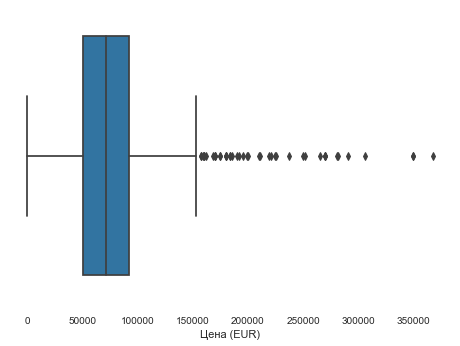

In [234]:
import seaborn as sns

sns.boxplot(x=data['Цена (EUR)'])

### Податоци што имаат вредност за цена

In [3]:
data_ceni = data.drop(data.loc[data['Цена (EUR)'] == 1].index, axis=0)
data_ceni = data_ceni.drop(data_ceni.loc[data_ceni['Цена (EUR)'] == 0].index, axis=0)
data_ceni


,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
0,К.Вода,35,2,NaN,NaN,NaN,NaN,30000,https://imoti247.com/mk/Prodavam-stan-50361.html
1,Центар,60,2,NaN,NaN,NaN,NaN,47000,https://imoti247.com/mk/Prodavam-stan-50362.html
3,Хиподром,67,3,1,NaN,1.0,1.0,47000,https://imoti247.com/mk/Pridavam-stan-vo-nasel...
4,Центар,93,3,7,1.0,1.0,1.0,102000,https://imoti247.com/mk/KAPISTEC-93M2-TROSOBEN...
5,Водно,136,4,1,NaN,1.0,1.0,130000,https://imoti247.com/mk/НАСЕЛБА-ВОДНО-УБАВ-4-С...
...,...,...,...,...,...,...,...,...,...
809,Маџари,78,3,4,NaN,NaN,1.0,51000,https://imoti247.com/mk/Продава-Станови-во-нас...
810,Тафталиџе,110,4,5,1.0,1.0,1.0,137000,https://imoti247.com/mk/Продава-Станови-во-нас...
811,Козле,209,4,3,1.0,1.0,1.0,219000,https://imoti247.com/mk/Продава-Станови-во-нас...
812,Козле,90,4,2,1.0,1.0,1.0,129000,https://imoti247.com/mk/Продава-Станови-во-нас...


In [4]:
data_ceni = data_ceni.drop("Линк", axis=1)


In [5]:
data_ceni_nas = data_ceni.drop(data_ceni.loc[data_ceni['Населба'].isnull()].index, axis=0)
data_ceni_nas

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,К.Вода,35,2,NaN,NaN,NaN,NaN,30000
1,Центар,60,2,NaN,NaN,NaN,NaN,47000
3,Хиподром,67,3,1,NaN,1.0,1.0,47000
4,Центар,93,3,7,1.0,1.0,1.0,102000
5,Водно,136,4,1,NaN,1.0,1.0,130000
...,...,...,...,...,...,...,...,...
809,Маџари,78,3,4,NaN,NaN,1.0,51000
810,Тафталиџе,110,4,5,1.0,1.0,1.0,137000
811,Козле,209,4,3,1.0,1.0,1.0,219000
812,Козле,90,4,2,1.0,1.0,1.0,129000


#### Податоци кои ќе се користат за предвидување на вредностите што недостасуваат за атрибутот "Спрат"

In [6]:
data_cn = data_ceni_nas.fillna(int(404))
data_cn

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,К.Вода,35,2,404,404.0,404.0,404.0,30000
1,Центар,60,2,404,404.0,404.0,404.0,47000
3,Хиподром,67,3,1,404.0,1.0,1.0,47000
4,Центар,93,3,7,1.0,1.0,1.0,102000
5,Водно,136,4,1,404.0,1.0,1.0,130000
...,...,...,...,...,...,...,...,...
809,Маџари,78,3,4,404.0,404.0,1.0,51000
810,Тафталиџе,110,4,5,1.0,1.0,1.0,137000
811,Козле,209,4,3,1.0,1.0,1.0,219000
812,Козле,90,4,2,1.0,1.0,1.0,129000


In [7]:
import numpy as np

np.unique(data_cn["Населба"].values, return_counts=True)

(array(['Ѓ.Петров', 'Автокоманда', 'Аеродром', 'Бардовци', 'Бутел', 'Влае',
        'Водно', 'Волково', 'Д.', 'Драчево', 'Други', 'Жданец', 'Железара',
        'Злокуќани', 'Илинден', 'К.Вода', 'Капиштец', 'Карпош', 'Козле',
        'Маџари', 'Н.Лисиче', 'Н.Пат', 'Острово', 'Пржино', 'Радишани',
        'С.Север', 'Сингелиќ', 'Т.Поле', 'Тафталиџе', 'Хиподром', 'Хром',
        'Центар', 'Црниче', 'Чаир'], dtype=object),
 array([ 36,  19,  69,   1,   1,  16,  29,   3,   2,   1,   4,   3,   6,
          3,   1,  97,  17,  57,  23,   6,  26,   3,  10,   7,   3,   4,
          5,   9,  61,   9,   7, 156,  36,  18], dtype=int64))

In [8]:
cleanup_naselbi = {"Населба": {"Ѓ.Петров": 1, "Аеродром": 2, "Влае": 3, 
                               "Водно": 4, "К.Вода": 5, "Карпош": 6, "Козле": 7, "Центар": 8, "Бардовци": 9, "Автокоманда": 10,
                              "Бутел": 11, "Волково": 12, "Д.": 13, "Драчево": 14, "Други": 35, "Жданец": 15, "Железара": 16,
                              "Злокуќани": 17, "Илинден": 18, "Н.Пат": 19, "Острово": 20, "Пржино": 21, "Радишани": 22,
                              "С.Север": 23, "Сингелиќ": 24, "Т.Поле": 25, "Хиподром": 26, "Трнодол": 27, "Хром": 28,
                              "Црниче": 29, "Чаир": 30, "Капиштец": 31, "Маџари": 32, "Н.Лисиче": 33, "Тафталиџе": 34}}

In [9]:
data_cn.replace(cleanup_naselbi, inplace=True)
data_cn

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5,35,2,404,404.0,404.0,404.0,30000
1,8,60,2,404,404.0,404.0,404.0,47000
3,26,67,3,1,404.0,1.0,1.0,47000
4,8,93,3,7,1.0,1.0,1.0,102000
5,4,136,4,1,404.0,1.0,1.0,130000
...,...,...,...,...,...,...,...,...
809,32,78,3,4,404.0,404.0,1.0,51000
810,34,110,4,5,1.0,1.0,1.0,137000
811,7,209,4,3,1.0,1.0,1.0,219000
812,7,90,4,2,1.0,1.0,1.0,129000


##### KNeighborsRegressor

In [10]:
data_cn.replace(to_replace="сутерен", value=-1, inplace=True)

In [11]:
data_cn

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5,35,2,404,404.0,404.0,404.0,30000
1,8,60,2,404,404.0,404.0,404.0,47000
3,26,67,3,1,404.0,1.0,1.0,47000
4,8,93,3,7,1.0,1.0,1.0,102000
5,4,136,4,1,404.0,1.0,1.0,130000
...,...,...,...,...,...,...,...,...
809,32,78,3,4,404.0,404.0,1.0,51000
810,34,110,4,5,1.0,1.0,1.0,137000
811,7,209,4,3,1.0,1.0,1.0,219000
812,7,90,4,2,1.0,1.0,1.0,129000


In [12]:
from sklearn.neighbors import KNeighborsRegressor


d_s = data_cn.drop(data_cn.loc[data_cn["Спрат"] == 404].index, axis=0) #превземање на ненултите вредности
sprat = d_s["Спрат"]
sprat = pd.to_numeric(sprat)
print(sprat)

neigh = KNeighborsRegressor(n_neighbors=3, algorithm ="kd_tree")
neigh.fit(d_s, sprat)
#KNeighborsRegressor(...)
#print(neigh.predict([[1.5]]))

3      1
4      7
5      1
9      0
12     3
      ..
809    4
810    5
811    3
812    2
813    1
Name: Спрат, Length: 636, dtype: int64


KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [13]:
d_c = data_cn
#print(d_c["Спрат"].values)
for index, row in d_c.iterrows():
    if row[3] == 404:
        
        row = pd.to_numeric(row)
        prediction = neigh.predict([row.values])
        row[3] = prediction
        
        d_c.loc[index] = row
        print(d_c.loc[index,])
        
        


Населба           5
Квадратура       35
Соби              2
Спрат             3
Лифт            404
Греење          404
Паркинг         404
Цена (EUR)    30000
Name: 0, dtype: object
Населба           8
Квадратура       60
Соби              2
Спрат             4
Лифт            404
Греење          404
Паркинг         404
Цена (EUR)    47000
Name: 1, dtype: object
Населба           2
Квадратура       72
Соби              3
Спрат             3
Лифт              1
Греење          404
Паркинг         404
Цена (EUR)    79200
Name: 8, dtype: object
Населба           1
Квадратура       51
Соби              1
Спрат             3
Лифт            404
Греење          404
Паркинг         404
Цена (EUR)    40000
Name: 11, dtype: object
Населба            8
Квадратура       157
Соби               4
Спрат              3
Лифт             404
Греење           404
Паркинг          404
Цена (EUR)    152400
Name: 15, dtype: object
Населба           8
Квадратура       60
Соби              3
Спрат          

Населба           5
Квадратура       47
Соби              2
Спрат             3
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    49350
Name: 269, dtype: object
Населба           17
Квадратура        80
Соби               0
Спрат              4
Лифт             404
Греење           404
Паркинг          404
Цена (EUR)    130000
Name: 365, dtype: object
Населба           12
Квадратура       210
Соби               4
Спрат              5
Лифт             404
Греење             1
Паркинг          404
Цена (EUR)    252000
Name: 384, dtype: object
Населба          10
Квадратура       56
Соби              0
Спрат             7
Лифт              1
Греење            1
Паркинг         404
Цена (EUR)    62300
Name: 423, dtype: object
Населба           2
Квадратура      101
Соби              4
Спрат             1
Лифт            404
Греење          404
Паркинг         404
Цена (EUR)    90000
Name: 479, dtype: object
Населба           5
Квадратура       36
Соби              2

Населба           12
Квадратура       176
Соби               4
Спрат              2
Лифт             404
Греење             1
Паркинг          404
Цена (EUR)    211200
Name: 766, dtype: object
Населба           34
Квадратура       291
Соби               5
Спрат              4
Лифт             404
Греење             1
Паркинг            1
Цена (EUR)    350000
Name: 797, dtype: object


In [14]:
data_cn

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5,35,2,3,404.0,404.0,404.0,30000
1,8,60,2,4,404.0,404.0,404.0,47000
3,26,67,3,1,404.0,1.0,1.0,47000
4,8,93,3,7,1.0,1.0,1.0,102000
5,4,136,4,1,404.0,1.0,1.0,130000
...,...,...,...,...,...,...,...,...
809,32,78,3,4,404.0,404.0,1.0,51000
810,34,110,4,5,1.0,1.0,1.0,137000
811,7,209,4,3,1.0,1.0,1.0,219000
812,7,90,4,2,1.0,1.0,1.0,129000


In [15]:
data_cn.replace(to_replace=404.0, value=-1, inplace=True)

In [16]:
data_cn

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5,35,2,3,-1.0,-1.0,-1.0,30000
1,8,60,2,4,-1.0,-1.0,-1.0,47000
3,26,67,3,1,-1.0,1.0,1.0,47000
4,8,93,3,7,1.0,1.0,1.0,102000
5,4,136,4,1,-1.0,1.0,1.0,130000
...,...,...,...,...,...,...,...,...
809,32,78,3,4,-1.0,-1.0,1.0,51000
810,34,110,4,5,1.0,1.0,1.0,137000
811,7,209,4,3,1.0,1.0,1.0,219000
812,7,90,4,2,1.0,1.0,1.0,129000


Добиеното податочно множество ќе се користи за предвидување на вредностите што недостасуваат од атрибутите: "Населба" и "Цена(EUR)".

In [17]:
data_predictions = data_cn

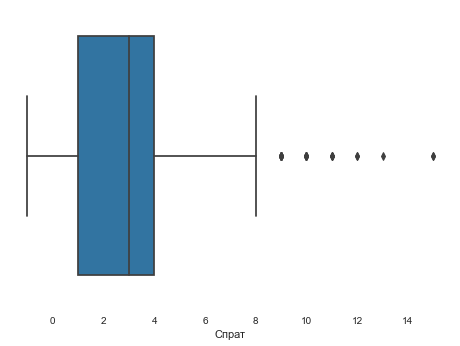

In [250]:
import seaborn as sns


sprat = pd.to_numeric(data_predictions['Спрат'])

sns.boxplot(x=sprat)

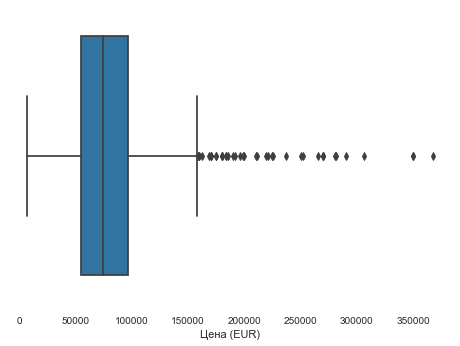

In [251]:
import seaborn as sns

sns.boxplot(x=data_predictions['Цена (EUR)'])

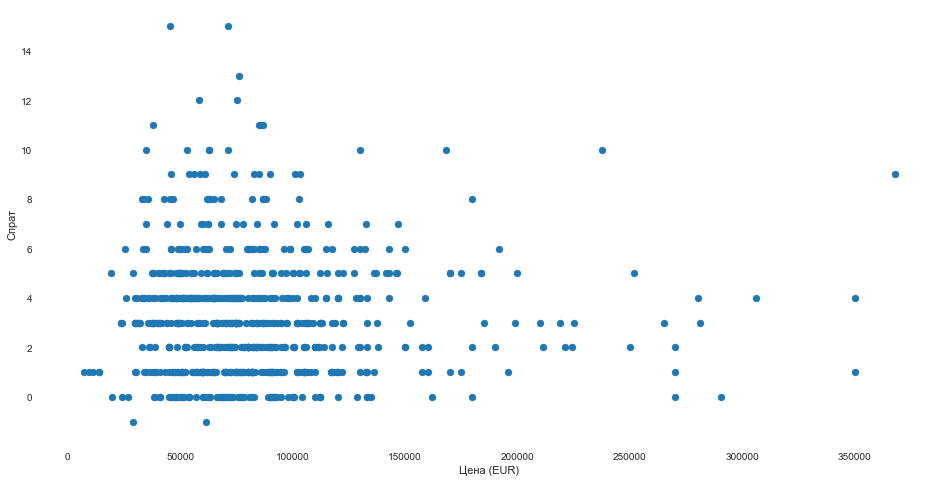

In [252]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_predictions['Цена (EUR)'], data_predictions['Спрат'])
ax.set_xlabel('Цена (EUR)')
ax.set_ylabel('Спрат')
plt.show()

### Податоци што немаат вредност за цена

In [18]:
data_1 = data.drop(data.loc[data['Цена (EUR)'] != 1].index, axis=0)
data_1.shape

(47, 9)

In [19]:
data_0 = data.drop(data.loc[data['Цена (EUR)'] != 0].index, axis=0)
data_0.shape

(16, 9)

In [20]:
frames = [data_0, data_1]

data_cena = pd.concat(frames)

In [21]:
data_cena

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
7,NaN,30,1,NaN,1.0,NaN,NaN,0,https://imoti247.com/mk/Se-prodava-50343.html
44,Ѓ.Петров,57,2,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Prodavam-stan-vo-Gorce...
82,Водно,158,3,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Prodav-stan-na-Vodno-s...
101,К.Вода,48,2,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/ПРОДАВАМ-50238.html
143,Црниче,85,3,2,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
...,...,...,...,...,...,...,...,...,...
611,Н.Лисиче,76,3,1,1.0,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...
726,Карпош,74,2,3,NaN,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...
754,Центар,100,4,3,1.0,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...
776,Центар,118,5,3,NaN,NaN,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...


In [22]:
data_cena["Соби"].isnull().values #no missing values here

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [23]:
data_cena["Населба"].isnull().values

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

Имаме вредности што недостасуваат за цена и за спрат истовремено:

In [24]:
data_missing_cs = data_cena.drop(data_cena.loc[data_cena['Спрат'].notnull()].index, axis=0)

In [25]:
data_missing_cs

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
7,NaN,30,1,NaN,1.0,NaN,NaN,0,https://imoti247.com/mk/Se-prodava-50343.html
44,Ѓ.Петров,57,2,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Prodavam-stan-vo-Gorce...
82,Водно,158,3,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Prodav-stan-na-Vodno-s...
101,К.Вода,48,2,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/ПРОДАВАМ-50238.html
248,Хиподром,58,3,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Продавам-стан-49934.html
263,Водно,176,3,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Prodavam-stan-na-Vodno...
531,К.Вода,0,0,NaN,NaN,NaN,NaN,0,https://imoti247.com/mk/Продажба-на-станови-во...
571,Пинтија,77,3,NaN,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
2,Аеродром,61,3,NaN,NaN,NaN,NaN,1,https://imoti247.com/mk/61м2-стан-во-објект-во...
10,К.Вода,27,0,NaN,NaN,NaN,NaN,1,https://imoti247.com/mk/Se-prodavaat-garsonjer...


In [26]:
data_cena1 = data_cena.drop(data_cena.loc[data_cena['Спрат'].isnull()].index, axis=0) 

In [27]:
data_cena1 #ги исфрламе податоците кои имаат вредности што недостасуваат за спрат и за цена

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
143,Црниче,85,3,2,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
336,Црниче,78,3,1,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
567,Црниче,85,3,4,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
568,Црниче,85,3,3,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
569,Црниче,83,3,3,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
572,Центар,90,0,6,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
648,Центар,132,4,1,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
698,К.Вода,89,3,4,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
6,Капиштец,122,3,6,NaN,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...
13,Аеродром,66,3,2,1.0,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...


Исфрлање на овие 15 податоци од целосното податочно множество.

In [28]:
data_1 = data.drop(data_missing_cs.loc[data_cena['Спрат'].isnull()].index, axis=0) 

In [29]:
data_1

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
0,К.Вода,35,2,NaN,NaN,NaN,NaN,30000,https://imoti247.com/mk/Prodavam-stan-50361.html
1,Центар,60,2,NaN,NaN,NaN,NaN,47000,https://imoti247.com/mk/Prodavam-stan-50362.html
3,Хиподром,67,3,1,NaN,1.0,1.0,47000,https://imoti247.com/mk/Pridavam-stan-vo-nasel...
4,Центар,93,3,7,1.0,1.0,1.0,102000,https://imoti247.com/mk/KAPISTEC-93M2-TROSOBEN...
5,Водно,136,4,1,NaN,1.0,1.0,130000,https://imoti247.com/mk/НАСЕЛБА-ВОДНО-УБАВ-4-С...
...,...,...,...,...,...,...,...,...,...
809,Маџари,78,3,4,NaN,NaN,1.0,51000,https://imoti247.com/mk/Продава-Станови-во-нас...
810,Тафталиџе,110,4,5,1.0,1.0,1.0,137000,https://imoti247.com/mk/Продава-Станови-во-нас...
811,Козле,209,4,3,1.0,1.0,1.0,219000,https://imoti247.com/mk/Продава-Станови-во-нас...
812,Козле,90,4,2,1.0,1.0,1.0,129000,https://imoti247.com/mk/Продава-Станови-во-нас...


In [30]:
data_cena["Спрат"].isnull().values

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False])

In [31]:
cleanup_naselbi = {"Населба": {"Ѓ.Петров": 1, "Аеродром": 2, "Влае": 3, 
                               "Водно": 4, "К.Вода": 5, "Карпош": 6, "Козле": 7, "Центар": 8, "Бардовци": 9, "Автокоманда": 10,
                              "Бутел": 11, "Волково": 12, "Д.": 13, "Драчево": 14, "Други": 35, "Жданец": 15, "Железара": 16,
                              "Злокуќани": 17, "Илинден": 18, "Н.Пат": 19, "Острово": 20, "Пржино": 21, "Радишани": 22,
                              "С.Север": 23, "Сингелиќ": 24, "Т.Поле": 25, "Хиподром": 26, "Трнодол": 27, "Хром": 28,
                              "Црниче": 29, "Чаир": 30, "Капиштец": 31, "Маџари": 32, "Н.Лисиче": 33, "Тафталиџе": 34}}

In [32]:
data_cena1.replace(cleanup_naselbi, inplace=True)
data_cena1

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
143,29,85,3,2,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
336,29,78,3,1,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
567,29,85,3,4,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
568,29,85,3,3,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
569,29,83,3,3,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
572,8,90,0,6,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
648,8,132,4,1,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
698,5,89,3,4,NaN,1.0,NaN,0,https://imoti247.com/mk/Продава-Станови-во-нас...
6,31,122,3,6,NaN,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...
13,2,66,3,2,1.0,1.0,NaN,1,https://imoti247.com/mk/Продава-Станови-во-нас...


Финалните податоци на кои ке им се предвидува цената:

In [33]:
data_cena1 = data_cena1.fillna(-1)
data_cena1

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
143,29,85,3,2,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
336,29,78,3,1,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
567,29,85,3,4,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
568,29,85,3,3,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
569,29,83,3,3,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
572,8,90,0,6,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
648,8,132,4,1,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
698,5,89,3,4,-1.0,1.0,-1.0,0,https://imoti247.com/mk/Продава-Станови-во-нас...
6,31,122,3,6,-1.0,1.0,-1.0,1,https://imoti247.com/mk/Продава-Станови-во-нас...
13,2,66,3,2,1.0,1.0,-1.0,1,https://imoti247.com/mk/Продава-Станови-во-нас...


In [34]:
data_cena1 = data_cena1.drop("Линк", axis=1)

Исфрлање на вредностите што ги има во ова множество, од множеството кое ќе ни послужи како тренирачко при предвидување со моделот на KNRegressor.

In [35]:
from sklearn.neighbors import KNeighborsRegressor

d_s1 = data_predictions
cena_stan = d_s1["Цена (EUR)"]
d_s1 = data_predictions.drop("Цена (EUR)", axis=1)
cena_stan = pd.to_numeric(cena_stan)
print(cena_stan)

neigh = KNeighborsRegressor(n_neighbors=5, algorithm ="kd_tree")
neigh.fit(d_s1, cena_stan)
#KNeighborsRegressor(...)
#print(neigh.predict([[1.5]]))

0       30000
1       47000
3       47000
4      102000
5      130000
        ...  
809     51000
810    137000
811    219000
812    129000
813     92000
Name: Цена (EUR), Length: 748, dtype: int64


KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [36]:
d_c1 = data_cena1
#print(d_c1["Спрат"].values)
for index, row in d_c1.iterrows():
    if row[7] == 0 or row[7] == 1 :
        
        row = pd.to_numeric(row)
        prediction = neigh.predict([row.drop(["Цена (EUR)"])])
        row[7] = prediction
        
        d_c1.loc[index] = row
        print(d_c1.loc[index,])
        

Населба          29
Квадратура       85
Соби              3
Спрат             2
Лифт             -1
Греење            1
Паркинг          -1
Цена (EUR)    81520
Name: 143, dtype: object
Населба          29
Квадратура       78
Соби              3
Спрат             1
Лифт             -1
Греење            1
Паркинг          -1
Цена (EUR)    92180
Name: 336, dtype: object
Населба          29
Квадратура       85
Соби              3
Спрат             4
Лифт             -1
Греење            1
Паркинг          -1
Цена (EUR)    78120
Name: 567, dtype: object
Населба          29
Квадратура       85
Соби              3
Спрат             3
Лифт             -1
Греење            1
Паркинг          -1
Цена (EUR)    78120
Name: 568, dtype: object
Населба          29
Квадратура       83
Соби              3
Спрат             3
Лифт             -1
Греење            1
Паркинг          -1
Цена (EUR)    85700
Name: 569, dtype: object
Населба           8
Квадратура       90
Соби              0
Спрат          

In [37]:
data_cena1

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
143,29.0,85.0,3.0,2,-1.0,1.0,-1.0,81520.0
336,29.0,78.0,3.0,1,-1.0,1.0,-1.0,92180.0
567,29.0,85.0,3.0,4,-1.0,1.0,-1.0,78120.0
568,29.0,85.0,3.0,3,-1.0,1.0,-1.0,78120.0
569,29.0,83.0,3.0,3,-1.0,1.0,-1.0,85700.0
572,8.0,90.0,0.0,6,-1.0,1.0,-1.0,90702.0
648,8.0,132.0,4.0,1,-1.0,1.0,-1.0,154304.0
698,5.0,89.0,3.0,4,-1.0,1.0,-1.0,76942.0
6,31.0,122.0,3.0,6,-1.0,1.0,-1.0,113600.0
13,2.0,66.0,3.0,2,1.0,1.0,-1.0,70900.0


Сега во data_cena1 ги имаме податоците со предвидени вредности за цена.

In [38]:
data_cena1.shape

(48, 8)

In [61]:
data_cena1['Спрат'].values

array([2.0, 1.0, 4.0, 3.0, 3.0, 6.0, 1.0, 4.0, 6.0, 2.0, 0.0, 3.0, 1.0,
       4.0, 2.0, 2.0, 14.0, 4.0, 1.0, 2.0, 4.0, 0.0, 7.0, 2.0, 1.0, 2.0,
       2.0, 2.0, 2.0, 4.0, 1.0, 12.0, 5.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0,
       4.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0], dtype=object)

In [39]:
data_predictions.shape

(748, 8)

Во следната табела ги имаме оние податочни единки, односно последните 4 кои останаа, кои имаат вредности што недотасуваат за атрибутот "Населба", и воедно 2 од нив дополнително немаат вредност за атрибутот "Цена".

In [40]:
dddd = data_1.drop(data_1.loc[data_1["Населба"].notnull()].index, axis=0)
dddd               

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Линк
151,NaN,57,3,3,NaN,NaN,NaN,55000,https://imoti247.com/mk/Продавам-стан-во-строг...
180,NaN,0,0,NaN,NaN,NaN,NaN,40000,https://imoti247.com/mk/Купувам-стан-50020.html
530,NaN,60,2,NaN,NaN,NaN,NaN,15000,https://imoti247.com/mk/Se-izdava-renoviran-st...


In [41]:
frames = [data_predictions, data_cena1]

data_final1 = pd.concat(frames)
data_final1

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2.0,3,-1.0,-1.0,-1.0,30000.0
1,8.0,60.0,2.0,4,-1.0,-1.0,-1.0,47000.0
3,26.0,67.0,3.0,1,-1.0,1.0,1.0,47000.0
4,8.0,93.0,3.0,7,1.0,1.0,1.0,102000.0
5,4.0,136.0,4.0,1,-1.0,1.0,1.0,130000.0
...,...,...,...,...,...,...,...,...
611,33.0,76.0,3.0,1,1.0,1.0,-1.0,77640.0
726,6.0,74.0,2.0,3,-1.0,1.0,-1.0,81260.0
754,8.0,100.0,4.0,3,1.0,1.0,-1.0,105606.0
776,8.0,118.0,5.0,3,-1.0,-1.0,-1.0,122680.0


In [42]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data_final1)
prof.to_file('profiling11.html')

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
data_final1.to_csv (r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi_final.csv', index = False, header=True)

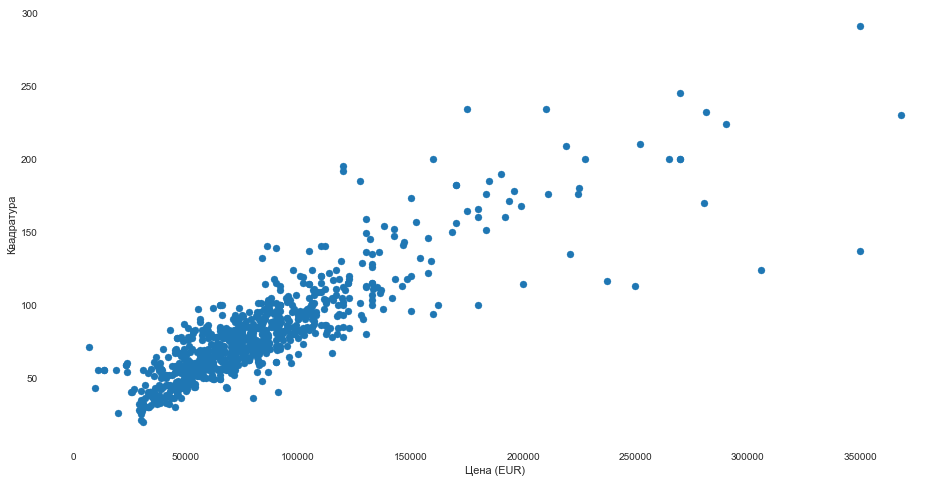

In [281]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_final1['Цена (EUR)'],data_final1['Квадратура'])
ax.set_xlabel('Цена (EUR)')
ax.set_ylabel('Квадратура')
plt.show()

## Ново множество

In [348]:
from requests import get
from bs4 import BeautifulSoup
import csv

br_sobi_rez = []
kvadratura_rez=[]
greenje_rez = []
parking_rez = []
lift_rez = []
sprat_rez = []
cena_rez = []
naselba_rez = []
tip_oglas_rez = []
datum_objava_rez = []
link_rez = []
base_url = 'https://reklama5.mk'

for i in range(1,80):
  
  page = str(i)
  url = 'https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page='+page+'&SortByPrice=0&zz=1&cat=159'
  print(url)
  response = get(url)
  
  html_soup = BeautifulSoup(response.text, 'html.parser')
  ad_containers = html_soup.find_all('div', class_ = 'OglasResults')
  

  ad_links = []
  for ad in ad_containers:
    ad_links.append(ad.find('a',class_='SearchAdTitle')['href'])


  for ad_link in ad_links:
    
    sobi_flag = 0
    greenje_flag = 0
    kvadratura_flag = 0 
    parking_flag = 0 
    greenje_flag  = 0 
    sprat_flag = 0
    lift_flag = 0


    response = get(base_url+ad_link)
    link = base_url+ad_link
    print(link)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    result = html_soup.find_all('p','oglasTitle')

    for r in result:
      rez = r.text
      string_split = rez.split(":");
      if (string_split[0] == 'Број на соби'):
        sobi_flag = 1
        br_sobi_rez.append(string_split[1].strip())
      elif (string_split[0] == 'Квадратура'):
        kvadratura_flag = 1
        if string_split[1].strip().split(" ")[0] == str(1):
            print("1 e kvadraturata")
            kvadratura_rez.append('NaN')
        else:
            print("kv e okej")
            kvadratura_rez.append(string_split[1].strip().split(" ")[0])
      elif (string_split[0] == 'Греење'):
        greenje_flag = 1
        greenje_substring = string_split[1].strip().lower()
        if ( greenje_substring == 'нема'):
          greenje_tip = 0;
        elif ( greenje_substring == 'централно' or  greenje_substring == 'струја'):
          greenje_tip = 1;
        else:
          greenje_tip = 'NaN';

        greenje_rez.append(greenje_tip)
      elif (string_split[0] == 'Број на паркинг/гаража'):
        parking_flag = 1
        parking_substring = string_split[1].strip().lower()
        if (parking_substring == 'нема'):
          parking_bool = 0
        else:
          parking_bool = 1
        parking_rez.append(parking_bool)
      elif (string_split[0] == 'Лифт'):
        lift_flag = 1
        lift_substring = string_split[1].strip().lower()
        if (lift_substring == 'да'):
          lift_bool = 1
        elif (lift_substring == 'не'):
          lift_bool = 0
        else:
          lift_bool = 'NaN'
        lift_rez.append(lift_bool)
      elif (string_split[0] == 'Спрат'):
        sprat_flag  = 1
        sprat_split = string_split[1].strip().lower().split(" ")
        if (sprat_split[0] == 'приземје'):
          sprat_kat = 0
        elif (sprat_split[0] == 'поткровје'):
          sprat_kat = 'поткровје'
        else:
          sprat_kat = sprat_split[0]
        sprat_rez.append(sprat_kat)
    
    if (sprat_flag == 0):
      sprat_rez.append('NaN')
    if (greenje_flag == 0):
      greenje_rez.append('NaN')
    if (parking_flag == 0):
      parking_rez.append('NaN')
    if (lift_flag == 0):
      lift_rez.append('NaN')
    if (kvadratura_flag == 0):
      kvadratura_rez.append('NaN')
    if (sobi_flag == 0):
      br_sobi_rez.append('NaN')
    result = html_soup.find('span','adDetailPrice')

    cena_split = result.text.strip().lower().split(' ')
    print("cena_split[0]")
    print(cena_split[0])
    print("cena_split[1]")
    print(cena_split[1])
    
    if (cena_split[0] == '1' or cena_split[0] == 'по'):
     
      cena = 'NaN' 
    elif (cena_split[1] == 'МКД' or cena_split[1] == 'мкд'):
        if "." in str(cena_split[0]):
            cena = int(float(cena_split[0]) * 1000)
        else:
            cena = int(cena_split[0])
        cena = int(cena) * 0.016
        #cena = str(cena + 'da')
        print(cena)
      
         
    else:
      
      cena = str(cena_split[0])
        
    if "." in str(cena_split[0]):
        cena = int(float(cena_split[0]) * 1000)
        print(cena)
    
    cena_rez.append(cena)  

    result = html_soup.find('div','certBg').p
    if (len(result.text.split(":")) > 1):
      naselba = result.text.split(":")[1].strip().lower()
      if (naselba == 'кисела вода'):
        naselba = 'К.Вода'
      elif (naselba == 'скопје центар' ):
        naselba = 'Центар'
      else:
        naselba = result.text.split(":")[1].strip()
      
    else:
      naselba = 'NaN'
    naselba_rez.append(naselba)

    result = html_soup.find_all('p','clear-margin')
    # print(result[1].b.text)
    tip_oglas_rez.append(result[1].b.text)

    result = html_soup.find('div','adHeading')
    res = result.div.text.split('|')
    datum_objava_rez.append(res[1].split(',')[0].split(":")[1].strip())
    link_rez.append(link)
print(naselba_rez)
print(cena_rez)
print(br_sobi_rez)
print(kvadratura_rez)
print(greenje_rez)
print(parking_rez)
print(lift_rez)
print(sprat_rez)
print(tip_oglas_rez)
print(datum_objava_rez)
print(link_rez)


https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=1&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3657191
kv e okej
cena_split[0]
43.500
cena_split[1]
€
43500
https://reklama5.mk/AdDetails?ad=1706695
kv e okej
cena_split[0]
350
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2849653
kv e okej
cena_split[0]
200
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3114268
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=3494000
kv e okej
cena_split[0]
80.000
cena_split[1]
€
80000
https://reklama5.mk/AdDetails?ad=3662225
kv e okej
cena_split[0]
700
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=1664859
kv e okej
cena_split[0]
78.000
cena_split[1]
€
78000
https://reklama5.mk/AdDetails?ad=3651244
kv e okej
cena_split[0

https://reklama5.mk/AdDetails?ad=3658018
kv e okej
cena_split[0]
50.000
cena_split[1]
€
50000
https://reklama5.mk/AdDetails?ad=3641435
kv e okej
cena_split[0]
63.000
cena_split[1]
€
63000
https://reklama5.mk/AdDetails?ad=3627817
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3659774
kv e okej
cena_split[0]
9.000
cena_split[1]
мкд
144.0
9000
https://reklama5.mk/AdDetails?ad=3628372
kv e okej
cena_split[0]
9.000
cena_split[1]
мкд
144.0
9000
https://reklama5.mk/AdDetails?ad=3539496
kv e okej
cena_split[0]
51.500
cena_split[1]
€
51500
https://reklama5.mk/AdDetails?ad=3375254
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=2813068
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3564544
kv e okej
cena_split[0]
79.000
cena_split[1]
€
79000
https://reklama5.mk/AdDetails?ad=3664092
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3657024
kv e okej
cena_split[0]
1
cena_sp

https://reklama5.mk/AdDetails?ad=3478627
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3641754
kv e okej
cena_split[0]
65.000
cena_split[1]
€
65000
https://reklama5.mk/AdDetails?ad=3393803
kv e okej
cena_split[0]
1.080
cena_split[1]
€
1080
https://reklama5.mk/AdDetails?ad=3634730
kv e okej
cena_split[0]
39.000
cena_split[1]
€
39000
https://reklama5.mk/AdDetails?ad=3158056
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3644803
kv e okej
cena_split[0]
64.000
cena_split[1]
€
64000
https://reklama5.mk/AdDetails?ad=3607475
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3591259
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3650770
kv e okej
cena_split[0]
200
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3659747
kv e okej
cena_split[0]
9.000
cena_split[1]
мкд
144.0
9000
https://reklama5.mk/AdDetails?ad=3612608
kv e okej
cena_split[0]
52.000
cena_split[1]
€
52000
h

https://reklama5.mk/AdDetails?ad=3643598
kv e okej
cena_split[0]
53.900
cena_split[1]
€
53900
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=6&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3460199
kv e okej
cena_split[0]
370
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3654374
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3659664
kv e okej
cena_split[0]
74.000
cena_split[1]
€
74000
https://reklama5.mk/AdDetails?ad=3577540
kv e okej
cena_split[0]
47.000
cena_split[1]
€
47000
https://reklama5.mk/AdDetails?ad=3640579
kv e okej
cena_split[0]
85.000
cena_split[1]
€
85000
https://reklama5.mk/AdDetails?ad=3641462
kv e okej
cena_split[0]
50.000
cena_split[1]
€
50000
https://reklama5.mk/AdDetails?ad=3638049
kv e okej
cen

https://reklama5.mk/AdDetails?ad=3580050
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3633129
kv e okej
cena_split[0]
35.999
cena_split[1]
€
35999
https://reklama5.mk/AdDetails?ad=1860488
kv e okej
cena_split[0]
17
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3228793
kv e okej
cena_split[0]
62.000
cena_split[1]
€
62000
https://reklama5.mk/AdDetails?ad=3619399
kv e okej
cena_split[0]
52.000
cena_split[1]
€
52000
https://reklama5.mk/AdDetails?ad=3662860
kv e okej
cena_split[0]
48.000
cena_split[1]
€
48000
https://reklama5.mk/AdDetails?ad=3540189
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3630702
kv e okej
cena_split[0]
47.000
cena_split[1]
€
47000
https://reklama5.mk/AdDetails?ad=3662845
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=2708417
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3662803
kv e okej
cena_split[0]
71.900
cena_split[1]
€
71900
https://rek

https://reklama5.mk/AdDetails?ad=3662042
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3661973
kv e okej
cena_split[0]
41.000
cena_split[1]
€
41000
https://reklama5.mk/AdDetails?ad=3661955
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3661945
kv e okej
cena_split[0]
74.000
cena_split[1]
€
74000
https://reklama5.mk/AdDetails?ad=3629492
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3629868
kv e okej
cena_split[0]
200
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3661911
kv e okej
cena_split[0]
62.000
cena_split[1]
€
62000
https://reklama5.mk/AdDetails?ad=3661906
kv e okej
cena_split[0]
87.000
cena_split[1]
€
87000
https://reklama5.mk/AdDetails?ad=3604317
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3233011
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3620508
kv e okej
cena_split[0]
55.000
cena_split[

https://reklama5.mk/AdDetails?ad=3660718
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3645853
kv e okej
cena_split[0]
850
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3660632
kv e okej
cena_split[0]
1.350
cena_split[1]
€
1350
https://reklama5.mk/AdDetails?ad=3643848
kv e okej
cena_split[0]
65.000
cena_split[1]
€
65000
https://reklama5.mk/AdDetails?ad=3660625
kv e okej
cena_split[0]
750
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3424986
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3624587
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3592714
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2191930
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3450480
cena_split[0]
1
cena_split[1]
мкд
https://reklama5.mk/AdDetails?ad=3450485
cena_split[0]
1
cena_split[1]
мкд
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&b

https://reklama5.mk/AdDetails?ad=3426312
kv e okej
cena_split[0]
160.000
cena_split[1]
€
160000
https://reklama5.mk/AdDetails?ad=3620562
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3653830
kv e okej
cena_split[0]
80.000
cena_split[1]
€
80000
https://reklama5.mk/AdDetails?ad=3659602
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=3097818
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3659593
kv e okej
cena_split[0]
36.000
cena_split[1]
€
36000
https://reklama5.mk/AdDetails?ad=3168308
kv e okej
cena_split[0]
61.000
cena_split[1]
€
61000
https://reklama5.mk/AdDetails?ad=3659573
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3626908
kv e okej
cena_split[0]
60
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3017750
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3483741
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.m

https://reklama5.mk/AdDetails?ad=3665427
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3619908
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=3657110
kv e okej
cena_split[0]
120.000
cena_split[1]
€
120000
https://reklama5.mk/AdDetails?ad=3416568
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3443116
kv e okej
cena_split[0]
131.000
cena_split[1]
€
131000
https://reklama5.mk/AdDetails?ad=3657103
kv e okej
cena_split[0]
350
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3657097
kv e okej
cena_split[0]
68.000
cena_split[1]
€
68000
https://reklama5.mk/AdDetails?ad=3657092
kv e okej
cena_split[0]
51.500
cena_split[1]
€
51500
https://reklama5.mk/AdDetails?ad=3657087
kv e okej
cena_split[0]
63.000
cena_split[1]
€
63000
https://reklama5.mk/AdDetails?ad=3616024
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3400660
kv e okej
cena_split[0]
62.000
cena_split[1]
€

https://reklama5.mk/AdDetails?ad=3653071
kv e okej
cena_split[0]
55.000
cena_split[1]
€
55000
https://reklama5.mk/AdDetails?ad=3654153
kv e okej
cena_split[0]
56.000
cena_split[1]
€
56000
https://reklama5.mk/AdDetails?ad=3359196
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3427949
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3622117
kv e okej
cena_split[0]
1.350
cena_split[1]
€
1350
https://reklama5.mk/AdDetails?ad=3218244
kv e okej
cena_split[0]
58.000
cena_split[1]
€
58000
https://reklama5.mk/AdDetails?ad=3580964
kv e okej
cena_split[0]
57.000
cena_split[1]
€
57000
https://reklama5.mk/AdDetails?ad=3655402
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3655377
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3584392
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3623081
kv e okej
cena_split[0]
65.000
cena_split[1]
€
6500

https://reklama5.mk/AdDetails?ad=3509863
kv e okej
cena_split[0]
51.000
cena_split[1]
€
51000
https://reklama5.mk/AdDetails?ad=3654030
kv e okej
cena_split[0]
1.230
cena_split[1]
€
1230
https://reklama5.mk/AdDetails?ad=3642987
kv e okej
cena_split[0]
36.000
cena_split[1]
€
36000
https://reklama5.mk/AdDetails?ad=3530359
kv e okej
cena_split[0]
17.000
cena_split[1]
€
17000
https://reklama5.mk/AdDetails?ad=2874883
kv e okej
cena_split[0]
500
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3653906
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3653903
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3588270
kv e okej
cena_split[0]
48.000
cena_split[1]
€
48000
https://reklama5.mk/AdDetails?ad=3645663
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3649549
kv e okej
cena_split[0]
43.500
cena_split[1]
€
43500
https://reklama5.mk/AdDetails?ad=3649654
kv e okej
cena_split[0]
1.070
cena_split[1]
€
1070
htt

https://reklama5.mk/AdDetails?ad=3633049
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3329757
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3652087
kv e okej
cena_split[0]
7.500
cena_split[1]
мкд
120.0
7500
https://reklama5.mk/AdDetails?ad=3628355
kv e okej
cena_split[0]
9.000
cena_split[1]
мкд
144.0
9000
https://reklama5.mk/AdDetails?ad=3487028
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2907479
kv e okej
cena_split[0]
1.200
cena_split[1]
€
1200
https://reklama5.mk/AdDetails?ad=3444574
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=19&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3662038
kv e okej
cena_split[

https://reklama5.mk/AdDetails?ad=3649646
kv e okej
cena_split[0]
78.000
cena_split[1]
€
78000
https://reklama5.mk/AdDetails?ad=3422901
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3515356
kv e okej
cena_split[0]
92.000
cena_split[1]
€
92000
https://reklama5.mk/AdDetails?ad=3608078
kv e okej
cena_split[0]
1.080
cena_split[1]
€
1080
https://reklama5.mk/AdDetails?ad=2913552
kv e okej
cena_split[0]
1.300
cena_split[1]
€
1300
https://reklama5.mk/AdDetails?ad=3264745
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3649579
kv e okej
cena_split[0]
58.000
cena_split[1]
€
58000
https://reklama5.mk/AdDetails?ad=3439736
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3649571
kv e okej
cena_split[0]
930
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3641119
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3649564
kv e okej
cena_split[0]
930
cena_split[1]
€
https://reklama5.mk/AdDetails?ad

https://reklama5.mk/AdDetails?ad=3665427
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3597926
kv e okej
cena_split[0]
990
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3647433
kv e okej
cena_split[0]
57.000
cena_split[1]
€
57000
https://reklama5.mk/AdDetails?ad=3615250
kv e okej
cena_split[0]
48.000
cena_split[1]
€
48000
https://reklama5.mk/AdDetails?ad=3527640
kv e okej
cena_split[0]
51.500
cena_split[1]
€
51500
https://reklama5.mk/AdDetails?ad=3647346
kv e okej
cena_split[0]
93.150
cena_split[1]
€
93150
https://reklama5.mk/AdDetails?ad=3627930
kv e okej
cena_split[0]
46.000
cena_split[1]
€
46000
https://reklama5.mk/AdDetails?ad=3643600
kv e okej
cena_split[0]
35.000
cena_split[1]
€
35000
https://reklama5.mk/AdDetails?ad=3643618
kv e okej
cena_split[0]
82.000
cena_split[1]
€
82000
https://reklama5.mk/AdDetails?ad=3448544
kv e okej
cena_split[0]
45.000
cena_split[1]
€
45000
https://reklama5.mk/AdDetails?ad=3588092
kv e okej
cena_split[0]
230
cena_spli

https://reklama5.mk/AdDetails?ad=3644503
kv e okej
cena_split[0]
38.000
cena_split[1]
€
38000
https://reklama5.mk/AdDetails?ad=2859057
kv e okej
cena_split[0]
92.200
cena_split[1]
€
92200
https://reklama5.mk/AdDetails?ad=2580751
kv e okej
cena_split[0]
115.500
cena_split[1]
€
115500
https://reklama5.mk/AdDetails?ad=3644468
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3644419
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3644411
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3644386
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3644374
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3644344
kv e okej
cena_split[0]
65.000
cena_split[1]
€
65000
https://reklama5.mk/AdDetails?ad=3644311
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=3644302
kv e okej
cena_split[0]
1.300

https://reklama5.mk/AdDetails?ad=3631405
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3616395
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3608266
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=3634842
kv e okej
cena_split[0]
1.450
cena_split[1]
€
1450
https://reklama5.mk/AdDetails?ad=3634929
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3637238
kv e okej
cena_split[0]
110.000
cena_split[1]
€
110000
https://reklama5.mk/AdDetails?ad=3640437
kv e okej
cena_split[0]
45.000
cena_split[1]
€
45000
https://reklama5.mk/AdDetails?ad=3641696
kv e okej
cena_split[0]
94.000
cena_split[1]
€
94000
https://reklama5.mk/AdDetails?ad=3641718
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=3642816
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3642800
kv e okej
cena_split[0]
1.200
ce

https://reklama5.mk/AdDetails?ad=3641448
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3506572
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3614376
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3641413
kv e okej
cena_split[0]
64.000
cena_split[1]
€
64000
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=27&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3589374
kv e okej
cena_split[0]
350
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3090415
kv e okej
cena_split[0]
300
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3665158
kv e okej
cena_split[0]
1.200
cena_split[1]
€
1200
https://reklama5.mk/AdDetails?ad=3641402
kv e okej
cena_split[0

https://reklama5.mk/AdDetails?ad=2231394
kv e okej
cena_split[0]
83.500
cena_split[1]
€
83500
https://reklama5.mk/AdDetails?ad=3633726
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2867376
kv e okej
cena_split[0]
150
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2899556
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3628739
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3638602
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3638423
kv e okej
cena_split[0]
69.000
cena_split[1]
€
69000
https://reklama5.mk/AdDetails?ad=3638262
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3638223
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3638217
kv e okej
cena_split[0]
44.000
cena_split[1]
€
44000
https://reklama5.mk/AdDetails?ad=3638212
kv e okej
cena_split[0]
84.000
cena_split[1]
€
84000
https://reklama5.m

https://reklama5.mk/AdDetails?ad=3581886
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3410108
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2509458
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3403190
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3635779
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3635769
kv e okej
cena_split[0]
76.000
cena_split[1]
€
76000
https://reklama5.mk/AdDetails?ad=3567112
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3597285
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3629826
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3629834
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=2287547
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.

https://reklama5.mk/AdDetails?ad=3478390
kv e okej
cena_split[0]
1.300
cena_split[1]
€
1300
https://reklama5.mk/AdDetails?ad=3633658
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2893315
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=3431722
kv e okej
cena_split[0]
93.000
cena_split[1]
€
93000
https://reklama5.mk/AdDetails?ad=3633600
kv e okej
cena_split[0]
61.000
cena_split[1]
€
61000
https://reklama5.mk/AdDetails?ad=3633491
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3467787
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3619417
kv e okej
cena_split[0]
67.000
cena_split[1]
€
67000
https://reklama5.mk/AdDetails?ad=3633435
kv e okej
cena_split[0]
68.500
cena_split[1]
€
68500
https://reklama5.mk/AdDetails?ad=3472035
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2793948
1 e kvadraturata
cena_split[0]
2.200
cena_split[1]
мкд
35.

https://reklama5.mk/AdDetails?ad=3618199
kv e okej
cena_split[0]
56.000
cena_split[1]
€
56000
https://reklama5.mk/AdDetails?ad=3619901
kv e okej
cena_split[0]
71.000
cena_split[1]
€
71000
https://reklama5.mk/AdDetails?ad=3620001
kv e okej
cena_split[0]
49.000
cena_split[1]
€
49000
https://reklama5.mk/AdDetails?ad=3629373
kv e okej
cena_split[0]
45.000
cena_split[1]
€
45000
https://reklama5.mk/AdDetails?ad=3518368
kv e okej
cena_split[0]
1.300
cena_split[1]
€
1300
https://reklama5.mk/AdDetails?ad=3629266
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3629263
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3589886
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3629178
kv e okej
cena_split[0]
46.000
cena_split[1]
€
46000
https://reklama5.mk/AdDetails?ad=3629174
kv e okej
cena_split[0]
51.000
cena_split[1]
€
51000
https://reklama5.mk/AdDetails?ad=3628064
kv e okej
cena_split[0]
56.500
cena_split[1

https://reklama5.mk/AdDetails?ad=3511236
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3623741
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3398927
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3359734
kv e okej
cena_split[0]
35.000
cena_split[1]
€
35000
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=35&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3430072
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3547290
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3655354
kv e okej
cena_split[0]
75.000
cena_split[1]
€
75000
https://reklama5.mk/AdDetails?ad=3623540
kv e okej
cena_split[0]
65.500
cena_sp

https://reklama5.mk/AdDetails?ad=3601671
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3616403
kv e okej
cena_split[0]
53.000
cena_split[1]
€
53000
https://reklama5.mk/AdDetails?ad=3619499
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3619260
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3369552
kv e okej
cena_split[0]
106.600
cena_split[1]
€
106600
https://reklama5.mk/AdDetails?ad=3614774
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3517284
kv e okej
cena_split[0]
72.000
cena_split[1]
€
72000
https://reklama5.mk/AdDetails?ad=3574491
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3595368
kv e okej
cena_split[0]
1.490
cena_split[1]
€
1490
https://reklama5.mk/AdDetails?ad=3566517
kv e okej
cena_split[0]
2.250
cena_split[1]
€
2250
https://reklama5.mk/AdDetails?ad=3588342
kv e okej
cena_split[0]
по
cena_split[1]
договор
http

https://reklama5.mk/AdDetails?ad=3604270
kv e okej
cena_split[0]
72.000
cena_split[1]
€
72000
https://reklama5.mk/AdDetails?ad=3609894
kv e okej
cena_split[0]
64.000
cena_split[1]
€
64000
https://reklama5.mk/AdDetails?ad=3594829
kv e okej
cena_split[0]
72.500
cena_split[1]
€
72500
https://reklama5.mk/AdDetails?ad=3615034
kv e okej
cena_split[0]
77.000
cena_split[1]
€
77000
https://reklama5.mk/AdDetails?ad=3594783
kv e okej
cena_split[0]
85.000
cena_split[1]
€
85000
https://reklama5.mk/AdDetails?ad=3398243
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3421213
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3610111
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=3614951
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3613871
kv e okej
cena_split[0]
33.000
cena_split[1]
€
33000
https://reklama5.mk/AdDetails?ad=3517580
kv e okej
cena_split[0]
89.000
cena_split[1]
€
89000

https://reklama5.mk/AdDetails?ad=3580725
kv e okej
cena_split[0]
73.500
cena_split[1]
€
73500
https://reklama5.mk/AdDetails?ad=3593690
kv e okej
cena_split[0]
43.750
cena_split[1]
€
43750
https://reklama5.mk/AdDetails?ad=3607566
kv e okej
cena_split[0]
74.000
cena_split[1]
€
74000
https://reklama5.mk/AdDetails?ad=3317714
cena_split[0]
79.000
cena_split[1]
€
79000
https://reklama5.mk/AdDetails?ad=3595373
kv e okej
cena_split[0]
1.490
cena_split[1]
€
1490
https://reklama5.mk/AdDetails?ad=3606957
kv e okej
cena_split[0]
1.120
cena_split[1]
€
1120
https://reklama5.mk/AdDetails?ad=3607021
kv e okej
cena_split[0]
68.000
cena_split[1]
€
68000
https://reklama5.mk/AdDetails?ad=3407215
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3026901
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=772333
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3597647
kv e okej
cena_split[0]
82.000
cena_split[1]
€
82000


https://reklama5.mk/AdDetails?ad=2575013
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3606678
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3566259
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3606565
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3166271
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3491565
kv e okej
cena_split[0]
1.200
cena_split[1]
€
1200
https://reklama5.mk/AdDetails?ad=3521580
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2460072
kv e okej
cena_split[0]
925
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3004592
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3500525
kv e okej
cena_split[0]
49.500
cena_split[1]
€
49500
https://reklama5.mk/AdDetails?ad=3503988
kv e okej
cena_split[0]
56.000
cena_split[1]
€
56000
https://reklama5.mk/AdDetails?ad=24678

https://reklama5.mk/AdDetails?ad=3661183
kv e okej
cena_split[0]
140
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3522277
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3657427
kv e okej
cena_split[0]
72.000
cena_split[1]
€
72000
https://reklama5.mk/AdDetails?ad=3596626
kv e okej
cena_split[0]
6.800
cena_split[1]
€
6800
https://reklama5.mk/AdDetails?ad=3353519
kv e okej
cena_split[0]
48.000
cena_split[1]
€
48000
https://reklama5.mk/AdDetails?ad=3440675
kv e okej
cena_split[0]
39.999
cena_split[1]
€
39999
https://reklama5.mk/AdDetails?ad=3596268
kv e okej
cena_split[0]
35.000
cena_split[1]
€
35000
https://reklama5.mk/AdDetails?ad=3596125
kv e okej
cena_split[0]
6.800
cena_split[1]
€
6800
https://reklama5.mk/AdDetails?ad=3596081
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3596072
kv e okej
cena_split[0]
1.080
cena_split[1]
€
1080
https://reklama5.mk/AdDetails?ad=3596069
kv e okej
cena_split[0]
1.100
cena_split[1]
€

https://reklama5.mk/AdDetails?ad=3576658
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=2869104
kv e okej
cena_split[0]
890
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3539902
kv e okej
cena_split[0]
97.200
cena_split[1]
€
97200
https://reklama5.mk/AdDetails?ad=3239761
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3587953
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3567072
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3587201
kv e okej
cena_split[0]
300
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3551873
kv e okej
cena_split[0]
111
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3398586
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3565989
kv e okej
cena_split[0]
40.000
cena_split[1]
€
40000
https://reklama5.mk/AdDetails?ad=3541821
kv e okej
cena_split[0]
79.000
cena_split[1]
€
79000
https://rekl

https://reklama5.mk/AdDetails?ad=3538163
kv e okej
cena_split[0]
77.000
cena_split[1]
€
77000
https://reklama5.mk/AdDetails?ad=3511348
kv e okej
cena_split[0]
1.110
cena_split[1]
€
1110
https://reklama5.mk/AdDetails?ad=2605212
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=2680636
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3576654
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3564772
kv e okej
cena_split[0]
63.000
cena_split[1]
€
63000
https://reklama5.mk/AdDetails?ad=3291518
kv e okej
cena_split[0]
39.000
cena_split[1]
€
39000
https://reklama5.mk/AdDetails?ad=3525713
kv e okej
cena_split[0]
42.000
cena_split[1]
€
42000
https://reklama5.mk/AdDetails?ad=3538704
kv e okej
cena_split[0]
87.000
cena_split[1]
€
87000
https://reklama5.mk/AdDetails?ad=3538688
kv e okej
cena_split[0]
48.000
cena_split[1]
€
48000
https://reklama5.mk/AdDetails?ad=3017645
kv e okej
cena_split[0]
860
cen

https://reklama5.mk/AdDetails?ad=3539910
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3565488
kv e okej
cena_split[0]
29.000
cena_split[1]
€
29000
https://reklama5.mk/AdDetails?ad=3436709
kv e okej
cena_split[0]
44.000
cena_split[1]
€
44000
https://reklama5.mk/AdDetails?ad=3461257
kv e okej
cena_split[0]
42.000
cena_split[1]
€
42000
https://reklama5.mk/AdDetails?ad=3388844
kv e okej
cena_split[0]
57.000
cena_split[1]
€
57000
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=48&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3643134
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3589374
kv e okej
cena_split[0]
350
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3662038
kv e okej
cena_s

https://reklama5.mk/AdDetails?ad=3415345
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3548363
kv e okej
cena_split[0]
39.000
cena_split[1]
€
39000
https://reklama5.mk/AdDetails?ad=3344231
kv e okej
cena_split[0]
200
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3545286
kv e okej
cena_split[0]
360
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3555581
kv e okej
cena_split[0]
50.000
cena_split[1]
€
50000
https://reklama5.mk/AdDetails?ad=3555564
kv e okej
cena_split[0]
84.000
cena_split[1]
€
84000
https://reklama5.mk/AdDetails?ad=2528003
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3554625
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3521063
kv e okej
cena_split[0]
33.200
cena_split[1]
€
33200
https://reklama5.mk/AdDetails?ad=857076
kv e okej
cena_split[0]
76.000
cena_split[1]
€
76000
https://reklama5.mk/AdDetails?ad=3553697
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://rek

https://reklama5.mk/AdDetails?ad=3542821
kv e okej
cena_split[0]
100.000
cena_split[1]
€
100000
https://reklama5.mk/AdDetails?ad=3118871
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3515276
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3542320
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3541939
kv e okej
cena_split[0]
65.000
cena_split[1]
€
65000
https://reklama5.mk/AdDetails?ad=3411008
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3541902
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3541820
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3541800
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2835632
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3446965
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetai

https://reklama5.mk/AdDetails?ad=3535111
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3535069
kv e okej
cena_split[0]
60.500
cena_split[1]
€
60500
https://reklama5.mk/AdDetails?ad=3535057
kv e okej
cena_split[0]
61.000
cena_split[1]
€
61000
https://reklama5.mk/AdDetails?ad=3535046
kv e okej
cena_split[0]
92.000
cena_split[1]
€
92000
https://reklama5.mk/AdDetails?ad=3455155
kv e okej
cena_split[0]
22.000
cena_split[1]
мкд
352.0
22000
https://reklama5.mk/AdDetails?ad=3534836
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3534766
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3534755
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3521535
kv e okej
cena_split[0]
1.170
cena_split[1]
€
1170
https://reklama5.mk/AdDetails?ad=3311739
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3512293
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://

https://reklama5.mk/AdDetails?ad=2619801
kv e okej
cena_split[0]
58.700
cena_split[1]
€
58700
https://reklama5.mk/AdDetails?ad=2156172
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3317150
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3529740
kv e okej
cena_split[0]
76.000
cena_split[1]
€
76000
https://reklama5.mk/AdDetails?ad=3529707
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3526917
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3529090
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3166597
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3328281
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=2468038
kv e okej
cena_split[0]
79.000
cena_split[1]
€
79000
https://reklama5.mk/AdDetails?ad=3426261
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdD

https://reklama5.mk/AdDetails?ad=3548199
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3649519
kv e okej
cena_split[0]
34.000
cena_split[1]
€
34000
https://reklama5.mk/AdDetails?ad=1706695
kv e okej
cena_split[0]
350
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3410700
kv e okej
cena_split[0]
125.000
cena_split[1]
€
125000
https://reklama5.mk/AdDetails?ad=3506393
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3521625
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=2802386
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3509170
kv e okej
cena_split[0]
1.250
cena_split[1]
€
1250
https://reklama5.mk/AdDetails?ad=3506564
kv e okej
cena_split[0]
1.260
cena_split[1]
€
1260
https://reklama5.mk/AdDetails?ad=3521548
kv e okej
cena_split[0]
1.090
cena_split[1]
€
1090
https://reklama5.mk/AdDetails?ad=3341238
kv e okej
cena_split[0]
37.000
cena_sp

https://reklama5.mk/AdDetails?ad=3515405
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3515382
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=3515333
kv e okej
cena_split[0]
68.000
cena_split[1]
€
68000
https://reklama5.mk/AdDetails?ad=3515169
kv e okej
cena_split[0]
120.000
cena_split[1]
€
120000
https://reklama5.mk/AdDetails?ad=3498638
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3509421
kv e okej
cena_split[0]
56.000
cena_split[1]
€
56000
https://reklama5.mk/AdDetails?ad=3514941
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=1328062
kv e okej
cena_split[0]
63.000
cena_split[1]
€
63000
https://reklama5.mk/AdDetails?ad=3511500
kv e okej
cena_split[0]
44.500
cena_split[1]
€
44500
https://reklama5.mk/AdDetails?ad=3512418
kv e okej
cena_split[0]
54.000
cena_split[1]
€
54000
https://reklama5.mk/AdDetails?ad=3512477
kv e okej
cena_split[0]

https://reklama5.mk/AdDetails?ad=3510246
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3510241
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3506234
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=3506374
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3504311
kv e okej
cena_split[0]
2
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3460007
kv e okej
cena_split[0]
200
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3258386
kv e okej
cena_split[0]
220
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3400535
kv e okej
cena_split[0]
92.000
cena_split[1]
€
92000
https://reklama5.mk/AdDetails?ad=3371664
kv e okej
cena_split[0]
39.000
cena_split[1]
€
39000
https://reklama5.mk/AdDetails?ad=3451099
kv e okej
cena_split[0]
55.000
cena_split[1]
€
55000
https://reklama5.mk/AdDetails?ad=3509257
kv e okej
cena_split[0]
130.000
cena_split[1]
€
130000
https://reklama5.mk

https://reklama5.mk/AdDetails?ad=1664530
kv e okej
cena_split[0]
75.000
cena_split[1]
€
75000
https://reklama5.mk/AdDetails?ad=3466277
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3466341
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3090790
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=2875592
kv e okej
cena_split[0]
1.300
cena_split[1]
€
1300
https://reklama5.mk/AdDetails?ad=3465993
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3504312
kv e okej
cena_split[0]
1.300
cena_split[1]
€
1300
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=61&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=1706695
kv e okej
cen

https://reklama5.mk/AdDetails?ad=3400195
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3496817
kv e okej
cena_split[0]
47.250
cena_split[1]
€
47250
https://reklama5.mk/AdDetails?ad=2339113
kv e okej
cena_split[0]
110.000
cena_split[1]
€
110000
https://reklama5.mk/AdDetails?ad=3496265
kv e okej
cena_split[0]
72.000
cena_split[1]
€
72000
https://reklama5.mk/AdDetails?ad=3467242
kv e okej
cena_split[0]
980
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3467236
kv e okej
cena_split[0]
980
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3480446
kv e okej
cena_split[0]
52.000
cena_split[1]
€
52000
https://reklama5.mk/AdDetails?ad=3086523
kv e okej
cena_split[0]
250.000
cena_split[1]
€
250000
https://reklama5.mk/AdDetails?ad=3395485
kv e okej
cena_split[0]
54.999
cena_split[1]
€
54999
https://reklama5.mk/AdDetails?ad=3485751
kv e okej
cena_split[0]
1.090
cena_split[1]
€
1090
https://reklama5.mk/AdDetails?ad=3485063
kv e okej
cena_split[0]
85.000
cena_split[1]
€

https://reklama5.mk/AdDetails?ad=3430472
kv e okej
cena_split[0]
1
cena_split[1]
мкд
https://reklama5.mk/AdDetails?ad=3193211
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3486852
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3483843
kv e okej
cena_split[0]
58.500
cena_split[1]
€
58500
https://reklama5.mk/AdDetails?ad=3486786
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3486763
kv e okej
cena_split[0]
70.000
cena_split[1]
€
70000
https://reklama5.mk/AdDetails?ad=3486754
kv e okej
cena_split[0]
65.000
cena_split[1]
€
65000
https://reklama5.mk/AdDetails?ad=3399309
kv e okej
cena_split[0]
44.500
cena_split[1]
€
44500
https://reklama5.mk/AdDetails?ad=3351322
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3386814
kv e okej
cena_split[0]
51.000
cena_split[1]
€
51000
https://reklama5.mk/AdDetails?ad=3399416
kv e okej
cena_split[0]
62.000
cena_split

https://reklama5.mk/AdDetails?ad=3481304
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3481207
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3459097
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3480696
kv e okej
cena_split[0]
45.000
cena_split[1]
€
45000
https://reklama5.mk/AdDetails?ad=3480649
kv e okej
cena_split[0]
66.300
cena_split[1]
€
66300
https://reklama5.mk/AdDetails?ad=3480530
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3474141
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3474687
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3480335
kv e okej
cena_split[0]
52.000
cena_split[1]
€
52000
https://reklama5.mk/AdDetails?ad=3480284
kv e okej
cena_split[0]
80.000
cena_split[1]
€
80000
https://reklama5.mk/AdDetails?ad=3480186
kv e okej
cena_split[0]
55.000
cena_split[1]
€
55000
https://reklama5

https://reklama5.mk/AdDetails?ad=3467322
kv e okej
cena_split[0]
150.000
cena_split[1]
€
150000
https://reklama5.mk/AdDetails?ad=3467189
kv e okej
cena_split[0]
250
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3467083
kv e okej
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3467078
kv e okej
cena_split[0]
42.500
cena_split[1]
€
42500
https://reklama5.mk/AdDetails?ad=3467063
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3467062
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3467031
kv e okej
cena_split[0]
820
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3466996
kv e okej
cena_split[0]
57.100
cena_split[1]
€
57100
https://reklama5.mk/AdDetails?ad=3461420
kv e okej
cena_split[0]
110.000
cena_split[1]
€
110000
https://reklama5.mk/AdDetails?ad=3466467
kv e okej
cena_split[0]
55.000
cena_split[1]
€
55000
https://reklama5.mk/AdDetails?ad=3466288
kv e okej
cena_split[0]
950
cena_split[

https://reklama5.mk/AdDetails?ad=3458552
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3153262
kv e okej
cena_split[0]
39.000
cena_split[1]
€
39000
https://reklama5.mk/AdDetails?ad=3458357
kv e okej
cena_split[0]
77.000
cena_split[1]
€
77000
https://reklama5.mk/AdDetails?ad=2820414
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/Search?q=&city=1&sell=0&sell=1&buy=0&rent=0&includeforrent=0&trade=0&trade=1&includeOld=0&includeOld=1&includeNew=0&includeNew=1&f45_from=&f45_to=&f46_from=&f46_to=&priceFrom=&priceTo=&f48_from=&f48_to=&f47=&f10029=&f10030=&f10040=&private=0&company=0&page=69&SortByPrice=0&zz=1&cat=159
https://reklama5.mk/AdDetails?ad=3661213
kv e okej
cena_split[0]
400
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=2649140
kv e okej
cena_split[0]
300
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3460199
kv e okej
cena_split[0]
370
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3458002
kv e okej
cena_split[0]
250

https://reklama5.mk/AdDetails?ad=3450722
kv e okej
cena_split[0]
85.000
cena_split[1]
€
85000
https://reklama5.mk/AdDetails?ad=3450670
kv e okej
cena_split[0]
57.600
cena_split[1]
€
57600
https://reklama5.mk/AdDetails?ad=3450664
kv e okej
cena_split[0]
95.000
cena_split[1]
€
95000
https://reklama5.mk/AdDetails?ad=3450632
kv e okej
cena_split[0]
102.000
cena_split[1]
€
102000
https://reklama5.mk/AdDetails?ad=2960167
kv e okej
cena_split[0]
200
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3429200
kv e okej
cena_split[0]
48.000
cena_split[1]
€
48000
https://reklama5.mk/AdDetails?ad=3447692
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3449572
kv e okej
cena_split[0]
23.000
cena_split[1]
€
23000
https://reklama5.mk/AdDetails?ad=3404064
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3429115
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3450477
kv e okej
cena_split[0]
75.000
cena_split[1]
€
75000

https://reklama5.mk/AdDetails?ad=3426057
kv e okej
cena_split[0]
86.450
cena_split[1]
€
86450
https://reklama5.mk/AdDetails?ad=3434534
kv e okej
cena_split[0]
47.200
cena_split[1]
€
47200
https://reklama5.mk/AdDetails?ad=3441007
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3403245
kv e okej
cena_split[0]
1.170
cena_split[1]
€
1170
https://reklama5.mk/AdDetails?ad=3440464
kv e okej
cena_split[0]
80.000
cena_split[1]
€
80000
https://reklama5.mk/AdDetails?ad=3440331
kv e okej
cena_split[0]
60.000
cena_split[1]
€
60000
https://reklama5.mk/AdDetails?ad=3440327
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3440323
kv e okej
cena_split[0]
55.000
cena_split[1]
€
55000
https://reklama5.mk/AdDetails?ad=3243508
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3436300
cena_split[0]
1.150
cena_split[1]
€
1150
https://reklama5.mk/AdDetails?ad=3440002
kv e okej
cena_split[0]
75.000
cena_split[1]
€
750

https://reklama5.mk/AdDetails?ad=3157489
kv e okej
cena_split[0]
890
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3312668
kv e okej
cena_split[0]
77.000
cena_split[1]
€
77000
https://reklama5.mk/AdDetails?ad=3404373
kv e okej
cena_split[0]
330
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3433166
kv e okej
cena_split[0]
52.000
cena_split[1]
€
52000
https://reklama5.mk/AdDetails?ad=2880003
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3361399
kv e okej
cena_split[0]
94.000
cena_split[1]
€
94000
https://reklama5.mk/AdDetails?ad=3414192
kv e okej
cena_split[0]
80.000
cena_split[1]
€
80000
https://reklama5.mk/AdDetails?ad=3432618
kv e okej
cena_split[0]
30.000
cena_split[1]
€
30000
https://reklama5.mk/AdDetails?ad=3426052
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3429163
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3429167
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetail

https://reklama5.mk/AdDetails?ad=3425008
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3399469
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3424824
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3424778
kv e okej
cena_split[0]
51.000
cena_split[1]
€
51000
https://reklama5.mk/AdDetails?ad=3424772
kv e okej
cena_split[0]
950
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3424735
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3368764
kv e okej
cena_split[0]
75.000
cena_split[1]
€
75000
https://reklama5.mk/AdDetails?ad=3424126
kv e okej
cena_split[0]
1.100
cena_split[1]
€
1100
https://reklama5.mk/AdDetails?ad=3404114
kv e okej
cena_split[0]
61.500
cena_split[1]
€
61500
https://reklama5.mk/AdDetails?ad=3420986
kv e okej
cena_split[0]
75.500
cena_split[1]
€
75500
https://reklama5.mk/AdDetails?ad=3423433
kv e okej
cena_split[0]
43.000
cena_split[1]
€
43000
htt

https://reklama5.mk/AdDetails?ad=3649519
kv e okej
cena_split[0]
34.000
cena_split[1]
€
34000
https://reklama5.mk/AdDetails?ad=3090415
kv e okej
cena_split[0]
300
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3660024
kv e okej
cena_split[0]
1.000
cena_split[1]
€
1000
https://reklama5.mk/AdDetails?ad=3414541
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3414234
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3414197
kv e okej
cena_split[0]
по
cena_split[1]
договор
https://reklama5.mk/AdDetails?ad=3414189
kv e okej
cena_split[0]
110.000
cena_split[1]
€
110000
https://reklama5.mk/AdDetails?ad=3185892
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3214233
kv e okej
cena_split[0]
90.000
cena_split[1]
€
90000
https://reklama5.mk/AdDetails?ad=3270764
kv e okej
cena_split[0]
62.000
cena_split[1]
€
62000
https://reklama5.mk/AdDetails?ad=3413719
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdD

https://reklama5.mk/AdDetails?ad=3406974
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3406470
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3406452
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3406435
kv e okej
cena_split[0]
81.000
cena_split[1]
€
81000
https://reklama5.mk/AdDetails?ad=3406391
kv e okej
cena_split[0]
90.000
cena_split[1]
€
90000
https://reklama5.mk/AdDetails?ad=3340244
kv e okej
cena_split[0]
147.000
cena_split[1]
€
147000
https://reklama5.mk/AdDetails?ad=3406287
kv e okej
cena_split[0]
42.000
cena_split[1]
€
42000
https://reklama5.mk/AdDetails?ad=3406277
kv e okej
cena_split[0]
54.600
cena_split[1]
€
54600
https://reklama5.mk/AdDetails?ad=3388802
kv e okej
cena_split[0]
1.050
cena_split[1]
€
1050
https://reklama5.mk/AdDetails?ad=3406165
kv e okej
cena_split[0]
1
cena_split[1]
€
https://reklama5.mk/AdDetails?ad=3406114
kv e okej
cena_split[0]
40.000
cena_split[1]
€
40000
https://re

In [349]:
import pandas as pd 
raw_data = {'Населба':naselba_rez,
            'Квадратура': kvadratura_rez,
            
            'Соби' : br_sobi_rez,
            'Спрат' : sprat_rez,
            'Лифт' : lift_rez,
            'Греење' : greenje_rez,
            'Паркинг' : parking_rez,
            
            
            'Цена (EUR)' : cena_rez,
            'Тип оглас': tip_oglas_rez,
            'Датум': datum_objava_rez,
            'Линк': link_rez
           }

df = pd.DataFrame(raw_data)
df.to_csv(r"C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi2.csv")
df


,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,Ѓорче Петров,75,4,4,0,1,1,43500,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
1,Центар,55,2,0,0,1,1,350,Се изнајмува,30.07.2020,https://reklama5.mk/AdDetails?ad=1706695
2,Центар,35,1,5,1,1,1,200,Се изнајмува,26.07.2020,https://reklama5.mk/AdDetails?ad=2849653
3,Чаир,145,5,0,0,1,1,95000,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,Гази Баба,101,6,11,1,1,1,80000,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
...,...,...,...,...,...,...,...,...,...,...,...
4172,Карпош,65,2,5,1,1,1,58500,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,Аеродром,73,2,2,1,1,0,65000,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,К.Вода,49,1,3,0,1,0,43000,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,Центар,100,4,7,1,1,1,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


In [91]:
import pandas as pd

data_2 = pd.read_csv(r"C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi2.csv", index_col=False)
data_2

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,Ѓорче Петров,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
1,Центар,55.0,2,0,0.0,1.0,1.0,350.0,Се изнајмува,30.07.2020,https://reklama5.mk/AdDetails?ad=1706695
2,Центар,35.0,1,5,1.0,1.0,1.0,200.0,Се изнајмува,26.07.2020,https://reklama5.mk/AdDetails?ad=2849653
3,Чаир,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,Гази Баба,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
...,...,...,...,...,...,...,...,...,...,...,...
4172,Карпош,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,Аеродром,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,К.Вода,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,Центар,100.0,4,7,1.0,1.0,1.0,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


In [92]:
df2 = data_2.drop(data_2.loc[data_2['Тип оглас'] == "Се изнајмува"].index, axis=0)

df2

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,Ѓорче Петров,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,Чаир,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,Гази Баба,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,Чаир,68.0,3,4,1.0,1.0,1.0,700.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,Карпош,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4172,Карпош,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,Аеродром,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,К.Вода,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,Центар,100.0,4,7,1.0,1.0,1.0,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


In [93]:
import datetime
for index, row in df2.iterrows():
    
    day = int(row[9][:2])
    month = int(row[9][3:5])
    year = int(row[9][6:10])
    x = datetime.datetime(2019, 8, 1)
    y = datetime.datetime(year, month, day)
    if y < x:
        print("Има постари огласи од 1 година!")       

In [94]:
#potkrovje i suteren

df2.replace(to_replace="сутерен", value=-1, inplace=True)
df2.replace(to_replace="поткровје", value=100, inplace=True)

In [95]:
#naselbi vo brojki

cleanup_naselbi = {"Населба": {"Ѓорче Петров": 1, "Аеродром": 2, "Влае": 3,  
                               "Водно": 4, "К.Вода": 5, "Карпош": 6, "Козле": 7, "Центар": 8, "Бардовци": 9, "Автокоманда": 10,
                              "Бутел": 11, "Волково": 12, "Д.": 13, "Драчево": 14, "Други": 35, "Жданец": 15, "Железара": 16,
                              "Злокуќани": 17, "Илинден": 18, "Н.Пат": 19, "Острово": 20, "Пржино": 21, "Радишани": 22,
                              "С.Север": 23, "Сингелиќ": 24, "Т.Поле": 25, "Хиподром": 26, "Трнодол": 27, "Хром": 28,
                              "Црниче": 29, "Чаир": 30, "Капиштец": 31, "Маџари": 32, "Н.Лисиче": 33, "Тафталиџе": 34, "Гази Баба":36, 
                               "Сарај": 37, "Петровец": 38, "Сопиште": 39}}

In [96]:
df2.replace(cleanup_naselbi, inplace=True)
df2

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,700.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,8,100.0,4,7,1.0,1.0,1.0,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


In [97]:
df2 = df2.drop(df2.loc[df2['Цена (EUR)'] <= 500].index, axis=0)
df2

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,700.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,8,100.0,4,7,1.0,1.0,1.0,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


### Податоци кои имат вредност за цена

In [98]:
df2_ceni = df2.drop(df2.loc[df2['Цена (EUR)'].isnull()].index, axis=0)
df2_ceni = df2_ceni.drop(df2_ceni.loc[df2_ceni['Цена (EUR)'] <= 500].index, axis=0)
df2_ceni

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,700.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4171,8,40.0,2,0,0.0,1.0,1.0,25000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400670
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578


Тука ги имаме податоците кои имаат валидни и немаат нулти вредности за цена.

In [99]:
for index, row in df2_ceni.iterrows():
    if row[7] < 2000:
        v = row[7] * row[1]
        row[7] = v        
        df2_ceni.loc[index] = row
        print(df2_ceni.loc[index,])
            

Населба                                             30
Квадратура                                          68
Соби                                                 3
Спрат                                                4
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       47600
Тип оглас                                   Се продава
Датум                                       03.08.2020
Линк          https://reklama5.mk/AdDetails?ad=3662225
Name: 5, dtype: object
Населба                                              2
Квадратура                                          50
Соби                                                 3
Спрат                                                2
Лифт                                                 1
Греење                                             NaN
Паркинг                                   

Населба                                              5
Квадратура                                          58
Соби                                                 2
Спрат                                                1
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       66990
Тип оглас                                   Се продава
Датум                                       01.08.2020
Линк          https://reklama5.mk/AdDetails?ad=3627568
Name: 190, dtype: object
Населба                                              5
Квадратура                                         106
Соби                                                 4
Спрат                                                4
Лифт                                                 1
Греење                                               1
Паркинг                                 

Населба                                              2
Квадратура                                          45
Соби                                                 2
Спрат                                                2
Лифт                                                 1
Греење                                             NaN
Паркинг                                              1
Цена (EUR)                                       49500
Тип оглас                                   Се продава
Датум                                       29.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3304543
Name: 413, dtype: object
Населба                                              2
Квадратура                                          54
Соби                                                 3
Спрат                                                9
Лифт                                                 1
Греење                                               1
Паркинг                                 

Name: 659, dtype: object
Населба                                              8
Квадратура                                          61
Соби                                               3,5
Спрат                                                0
Лифт                                                 1
Греење                                               1
Паркинг                                              0
Цена (EUR)                                       70150
Тип оглас                                   Се продава
Датум                                       24.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3545384
Name: 663, dtype: object
Населба                                              8
Квадратура                                          82
Соби                                               2,5
Спрат                                                0
Лифт                                                 1
Греење                                               1
Паркинг        

Name: 850, dtype: object
Населба                                              8
Квадратура                                          38
Соби                                                 2
Спрат                                                4
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       49400
Тип оглас                                   Се продава
Датум                                       21.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3654035
Name: 852, dtype: object
Населба                                              8
Квадратура                                          86
Соби                                               4,5
Спрат                                                5
Лифт                                                 1
Греење                                               1
Паркинг        

Населба                                              5
Квадратура                                          52
Соби                                                 3
Спрат                                                1
Лифт                                                 1
Греење                                             NaN
Паркинг                                              0
Цена (EUR)                                       51480
Тип оглас                                   Се продава
Датум                                       16.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3488925
Name: 1008, dtype: object
Населба                                             30
Квадратура                                          89
Соби                                                 3
Спрат                                                6
Лифт                                                 1
Греење                                             NaN
Паркинг                                

Населба                                              6
Квадратура                                          60
Соби                                                 2
Спрат                                                6
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       69000
Тип оглас                                   Се продава
Датум                                       10.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3644650
Name: 1190, dtype: object
Населба                                              6
Квадратура                                          85
Соби                                                 4
Спрат                                                0
Лифт                                                 0
Греење                                               1
Паркинг                                

Населба                                              2
Квадратура                                          77
Соби                                                 3
Спрат                                                7
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       80850
Тип оглас                                   Се продава
Датум                                       08.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3555253
Name: 1336, dtype: object
Населба                                              6
Квадратура                                          85
Соби                                                 3
Спрат                                                1
Лифт                                                 1
Греење                                               1
Паркинг                                

Name: 1539, dtype: object
Населба                                              2
Квадратура                                          50
Соби                                                 2
Спрат                                                7
Лифт                                                 1
Греење                                               1
Паркинг                                              0
Цена (EUR)                                       55000
Тип оглас                                   Се продава
Датум                                       01.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3629826
Name: 1541, dtype: object
Населба                                              2
Квадратура                                          60
Соби                                                 3
Спрат                                                2
Лифт                                                 1
Греење                                               1
Паркинг      

Name: 1734, dtype: object
Населба                                              8
Квадратура                                          52
Соби                                                 2
Спрат                                                2
Лифт                                                 1
Греење                                             NaN
Паркинг                                              1
Цена (EUR)                                       54600
Тип оглас                                   Се продава
Датум                                       22.06.2020
Линк          https://reklama5.mk/AdDetails?ad=3627274
Name: 1746, dtype: object
Населба                                              5
Квадратура                                          47
Соби                                                 3
Спрат                                                5
Лифт                                                 1
Греење                                             NaN
Паркинг      

Населба                                              5
Квадратура                                          40
Соби                                                 2
Спрат                                                3
Лифт                                                 1
Греење                                               1
Паркинг                                              0
Цена (EUR)                                       44000
Тип оглас                                   Се продава
Датум                                       31.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3548199
Name: 1902, dtype: object
Населба                                              5
Квадратура                                          53
Соби                                                 2
Спрат                                                3
Лифт                                                 1
Греење                                             NaN
Паркинг                                

Населба                                              1
Квадратура                                          71
Соби                                               3,5
Спрат                                                5
Лифт                                                 1
Греење                                               1
Паркинг                                              0
Цена (EUR)                                       65320
Тип оглас                                   Се продава
Датум                                       26.05.2020
Линк          https://reklama5.mk/AdDetails?ad=3407238
Name: 2184, dtype: object
Населба                                              5
Квадратура                                          49
Соби                                               2,5
Спрат                                              100
Лифт                                                 1
Греење                                             NaN
Паркинг                                

Населба                                              8
Квадратура                                          71
Соби                                                 3
Спрат                                                3
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       88750
Тип оглас                                   Се продава
Датум                                       12.05.2020
Линк          https://reklama5.mk/AdDetails?ad=3567072
Name: 2311, dtype: object
Населба                                              1
Квадратура                                          65
Соби                                                 3
Спрат                                                2
Лифт                                                 1
Греење                                             NaN
Паркинг                                

Населба                                              8
Квадратура                                          53
Соби                                                 2
Спрат                                                0
Лифт                                                 1
Греење                                             NaN
Паркинг                                              1
Цена (EUR)                                       63600
Тип оглас                                   Се продава
Датум                                       23.04.2020
Линк          https://reklama5.mk/AdDetails?ad=3559993
Name: 2450, dtype: object
Населба                                              8
Квадратура                                          84
Соби                                                 2
Спрат                                                5
Лифт                                                 1
Греење                                               1
Паркинг                                

Name: 2588, dtype: object
Населба                                              8
Квадратура                                         115
Соби                                                 4
Спрат                                                2
Лифт                                                 1
Греење                                               1
Паркинг                                              0
Цена (EUR)                                      115000
Тип оглас                                   Се продава
Датум                                       09.07.2020
Линк          https://reklama5.mk/AdDetails?ad=3430072
Name: 2589, dtype: object
Населба                                              2
Квадратура                                          54
Соби                                                 3
Спрат                                                9
Лифт                                                 1
Греење                                               1
Паркинг      

Населба                                              8
Квадратура                                          54
Соби                                                 2
Спрат                                                4
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       67500
Тип оглас                                   Се продава
Датум                                       01.03.2020
Линк          https://reklama5.mk/AdDetails?ad=3482984
Name: 2809, dtype: object
Населба                                              6
Квадратура                                          52
Соби                                                 2
Спрат                                                1
Лифт                                                 1
Греење                                               1
Паркинг                                

Населба                                              8
Квадратура                                         119
Соби                                                 4
Спрат                                                3
Лифт                                                 0
Греење                                             NaN
Паркинг                                              1
Цена (EUR)                                       90440
Тип оглас                                   Се продава
Датум                                       14.02.2020
Линк          https://reklama5.mk/AdDetails?ad=3514377
Name: 3019, dtype: object
Населба                                              2
Квадратура                                          77
Соби                                                 4
Спрат                                               10
Лифт                                                 1
Греење                                               1
Паркинг                                

Населба                                              6
Квадратура                                          61
Соби                                                 3
Спрат                                                2
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       79300
Тип оглас                                   Се продава
Датум                                       04.02.2020
Линк          https://reklama5.mk/AdDetails?ad=3504312
Name: 3170, dtype: object
Населба                                              6
Квадратура                                          72
Соби                                                 4
Спрат                                                2
Лифт                                                 0
Греење                                               1
Паркинг                                

Населба                                              6
Квадратура                                          56
Соби                                                 2
Спрат                                                6
Лифт                                                 1
Греење                                             NaN
Паркинг                                              1
Цена (EUR)                                       58800
Тип оглас                                   Се продава
Датум                                       16.01.2020
Линк          https://reklama5.mk/AdDetails?ad=3483040
Name: 3351, dtype: object
Населба                                              8
Квадратура                                          81
Соби                                                 3
Спрат                                                7
Лифт                                                 1
Греење                                               1
Паркинг                                

Населба                                              6
Квадратура                                          70
Соби                                                 3
Спрат                                                0
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       66500
Тип оглас                                   Се продава
Датум                                       23.12.2019
Линк          https://reklama5.mk/AdDetails?ad=3466288
Name: 3513, dtype: object
Населба                                              6
Квадратура                                          80
Соби                                                 3
Спрат                                                2
Лифт                                                 1
Греење                                               1
Паркинг                                

Name: 3730, dtype: object
Населба                                              6
Квадратура                                          68
Соби                                                 3
Спрат                                                3
Лифт                                                 0
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       78200
Тип оглас                                   Се продава
Датум                                       28.11.2019
Линк          https://reklama5.mk/AdDetails?ad=3182845
Name: 3751, dtype: object
Населба                                              8
Квадратура                                         108
Соби                                                 3
Спрат                                                1
Лифт                                                 1
Греење                                               1
Паркинг      

Name: 3979, dtype: object
Населба                                              2
Квадратура                                          67
Соби                                                 2
Спрат                                                2
Лифт                                                 1
Греење                                               1
Паркинг                                              0
Цена (EUR)                                       71020
Тип оглас                                   Се продава
Датум                                       05.11.2019
Линк          https://reklama5.mk/AdDetails?ad=3418821
Name: 3983, dtype: object
Населба                                              6
Квадратура                                          54
Соби                                                 2
Спрат                                                2
Лифт                                                 1
Греење                                               1
Паркинг      

Населба                                              8
Квадратура                                          77
Соби                                                 3
Спрат                                                1
Лифт                                                 1
Греење                                               1
Паркинг                                              1
Цена (EUR)                                       80850
Тип оглас                                   Се продава
Датум                                       21.10.2019
Линк          https://reklama5.mk/AdDetails?ad=3402969
Name: 4153, dtype: object
Населба                                              6
Квадратура                                          83
Соби                                                 4
Спрат                                                5
Лифт                                                 1
Греење                                               1
Паркинг                                

In [100]:
df2_ceni #сите цени се претворени во целосната вредност за цената на станот

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,47600.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4171,8,40.0,2,0,0.0,1.0,1.0,25000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400670
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578


In [101]:
df2 = df2.drop(df2.loc[df2['Квадратура'] == 4].index, axis=0)
df2

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,700.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,8,100.0,4,7,1.0,1.0,1.0,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


In [102]:
df2 = df2.drop(df2.loc[df2['Квадратура'] > 450].index, axis=0)
df2

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,700.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578
4175,8,100.0,4,7,1.0,1.0,1.0,NaN,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400554


In [76]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df2)
prof.to_file('profiling2.html')

##### Множество кое нема ниту една вредност што недостасува:

In [103]:
data_full = df2_ceni.drop(df2_ceni.loc[df2_ceni['Цена (EUR)'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Населба'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Квадратура'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Соби'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Спрат'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Спрат'] == ">15"].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Лифт'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Греење'].isnull()].index, axis=0)
data_full = data_full.drop(data_full.loc[data_full['Паркинг'].isnull()].index, axis=0)
#data_full = data_full.drop("Линк", axis=1)

data_full

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
0,1,75.0,4,4,0.0,1.0,1.0,43500.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3657191
3,30,145.0,5,0,0.0,1.0,1.0,95000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3114268
4,36,101.0,6,11,1.0,1.0,1.0,80000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3494000
5,30,68.0,3,4,1.0,1.0,1.0,47600.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=3662225
6,6,86.0,4,4,1.0,1.0,1.0,78000.0,Се продава,03.08.2020,https://reklama5.mk/AdDetails?ad=1664859
...,...,...,...,...,...,...,...,...,...,...,...
4171,8,40.0,2,0,0.0,1.0,1.0,25000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400670
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400666
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400593
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0,Се продава,18.10.2019,https://reklama5.mk/AdDetails?ad=3400578


In [104]:
data_full = data_full.drop(['Тип оглас'], axis=1)

In [105]:
data_full = data_full.drop(['Датум'], axis=1)
data_full = data_full.drop(['Линк'], axis=1)
data_full

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,1,75.0,4,4,0.0,1.0,1.0,43500.0
3,30,145.0,5,0,0.0,1.0,1.0,95000.0
4,36,101.0,6,11,1.0,1.0,1.0,80000.0
5,30,68.0,3,4,1.0,1.0,1.0,47600.0
6,6,86.0,4,4,1.0,1.0,1.0,78000.0
...,...,...,...,...,...,...,...,...
4171,8,40.0,2,0,0.0,1.0,1.0,25000.0
4172,6,65.0,2,5,1.0,1.0,1.0,58500.0
4173,2,73.0,2,2,1.0,1.0,0.0,65000.0
4174,5,49.0,1,3,0.0,1.0,0.0,43000.0


In [106]:
for i in data_full['Спрат'].values:
    print(i)

4
0
11
4
4
0
1
5
2
2
3
0
6
4
2
0
6
0
5
4
4
6
1
1
5
2
4
3
3
3
3
2
2
3
0
1
1
1
4
2
2
1
3
7
4
2
8
4
4
1
4
2
3
3
5
6
0
5
2
5
3
5
5
5
5
5
8
9
3
0
2
4
2
4
10
2
4
5
4
7
2
2
5
2
3
1
2
0
7
4
5
7
4
3
1
4
4
3
0
1
2
0
0
7
0
4
0
1
14
14
14
4
9
9
6
7
9
9
0
2
6
0
5
2
4
6
6
1
1
3
6
7
2
2
4
4
1
5
5
1
4
6
7
3
6
4
2
8
4
7
7
3
6
8
1
2
14
4
0
1
1
10
1
8
4
3
0
0
3
9
3
2
5
1
2
1
3
0
4
7
7
0
0
0
2
3
0
5
2
1
6
5
3
14
1
5
4
3
9
1
1
1
4
1
2
1
100
1
3
1
9
7
0
0
4
7
2
7
10
1
1
0
2
3
3
3
3
2
8
2
1
4
4
5
3
1
1
3
7
3
12
2
0
0
9
8
6
5
7
4
3
14
8
2
4
1
2
4
2
6
0
5
3
5
4
5
3
2
4
3
3
4
6
0
0
2
5
3
1
9
1
8
2
6
1
4
3
2
2
3
5
5
1
3
2
1
2
2
5
4
4
2
2
1
6
8
6
1
2
3
9
0
9
0
2
2
3
5
6
2
1
1
3
5
3
5
0
4
0
3
6
7
2
4
5
4
2
6
1
6
5
6
1
4
1
9
7
9
3
4
5
1
4
6
0
2
7
0
7
3
1
3
4
7
4
6
3
2
4
100
1
3
2
2
7
9
3
2
2
13
13
4
0
4
0
2
0
0
2
1
4
4
2
2
8
6
5
4
0
2
5
2
9
100
1
5
5
5
10
3
4
6
3
3
1
3
10
6
3
2
4
1
1
2
3
7
9
5
6
1
12
3
2
2
0
2
1
4
4
2
0
3
9
5
2
9
6
1
10
4
8
3
13
3
2
1
7
4
6
1
0
7
2
3
3
10
2
4
3
2
6
2
6
7
100
4
3
100
4
6
2
3
4
1
7
5

In [90]:
if data_full['Спрат'] is ">15":
    print(data_full['Спрат'])

In [107]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data_full)
prof.to_file('profiling2_full.html')

Зачувување на финалната верзија на податоците од второто податочно множество:

In [108]:
data_full.to_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi_final2.csv', index = False, header=True)

##### Дополнителни анализи и согледувања:

In [330]:
df2 = df2.drop(df2.loc[df2['Цена (EUR)'] == 1000].index, axis=0)

In [339]:
dff = df2.drop(df2.loc[df2['Цена (EUR)'] > 8000].index, axis=0)
dff

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
66,К.Вода,61.0,2,3,1.0,1.0,1.0,6499.0,Се продава,02.08.2020,https://reklama5.mk/AdDetails?ad=3627635
183,Центар,28.0,1,1,0.0,1.0,1.0,2200.0,Се продава,31.07.2020,https://reklama5.mk/AdDetails?ad=3451358
933,Центар,25.0,"1,5",0,1.0,1.0,1.0,7500.0,Се продава,19.07.2020,https://reklama5.mk/AdDetails?ad=3652087
1626,Аеродром,1.0,1,1,1.0,1.0,1.0,2200.0,Се продава,28.06.2020,https://reklama5.mk/AdDetails?ad=2793948
1879,Центар,36.0,2,1,0.0,1.0,0.0,2250.0,Се продава,13.06.2020,https://reklama5.mk/AdDetails?ad=3566517
1966,Центар,75.0,3,1,0.0,1.0,0.0,8000.0,Се продава,09.06.2020,https://reklama5.mk/AdDetails?ad=3606516
2203,Аеродром,93.0,4,NaN,0.0,1.0,1.0,6700.0,Се продава,22.05.2020,https://reklama5.mk/AdDetails?ad=3597775
2207,Аеродром,93.0,4,NaN,0.0,1.0,1.0,6700.0,Се продава,22.05.2020,https://reklama5.mk/AdDetails?ad=3597556
2214,Аеродром,93.0,4,NaN,0.0,1.0,1.0,6800.0,Се продава,21.05.2020,https://reklama5.mk/AdDetails?ad=3596626
2221,Аеродром,93.0,4,NaN,0.0,1.0,1.0,6800.0,Се продава,20.05.2020,https://reklama5.mk/AdDetails?ad=3596125


In [338]:
df2['Квадратура'].min()

1.0

Следниот код ги извлекува податочните членки кои немаат вредност за цена.

In [321]:
df2_null = df2.drop(df2.loc[df2['Цена (EUR)'].notnull()].index, axis=0)
df2_null1 = df2.drop(df2.loc[df2['Цена (EUR)'] >= 5 ].index, axis=0)

df2_null1

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум,Линк
3765,Центар,NaN,3,2,1.0,1.0,1.0,NaN,Се продава,26.11.2019,https://reklama5.mk/AdDetails?ad=3436300
4147,Карпош,NaN,3,3,1.0,1.0,1.0,NaN,Се продава,21.10.2019,https://reklama5.mk/AdDetails?ad=3314756


In [157]:
df2_cn = df2_null.drop(df2_null.loc[df2_null['Квадратура'].notnull()].index, axis=0)
df2_cn

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR),Тип оглас,Датум
361,Центар,NaN,NaN,0,0.0,NaN,NaN,NaN,Се продава,29.07.2020
482,Карпош,NaN,1,1,1.0,NaN,1.0,NaN,Се продава,28.07.2020
483,Карпош,NaN,1,1,1.0,NaN,1.0,NaN,Се продава,28.07.2020
484,К.Вода,NaN,NaN,0,0.0,NaN,NaN,NaN,Се продава,28.07.2020
1005,Центар,NaN,4,1,1.0,1.0,1.0,NaN,Се продава,16.07.2020
1480,Центар,NaN,4,2,1.0,1.0,1.0,NaN,Се продава,02.07.2020
2424,Центар,NaN,3,2,1.0,1.0,1.0,NaN,Се продава,26.04.2020
2486,К.Вода,NaN,1,4,1.0,NaN,1.0,NaN,Се продава,10.04.2020
3133,Центар,NaN,"2,5",2,1.0,1.0,1.0,NaN,Се продава,05.02.2020
3209,Карпош,NaN,2,1,0.0,1.0,1.0,NaN,Се продава,31.01.2020


## Составување на конечното податочно множество

In [170]:
import pandas as pd

data_f1 = pd.read_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi_final.csv')
data_f2 = pd.read_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi_final2.csv')

frames = [data_f1, data_f2]

stanovi_data = pd.concat(frames)
stanovi_data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2,3.0,-1.0,-1.0,-1.0,30000.0
1,8.0,60.0,2,4.0,-1.0,-1.0,-1.0,47000.0
2,26.0,67.0,3,1.0,-1.0,1.0,1.0,47000.0
3,8.0,93.0,3,7.0,1.0,1.0,1.0,102000.0
4,4.0,136.0,4,1.0,-1.0,1.0,1.0,130000.0
...,...,...,...,...,...,...,...,...
2503,8.0,40.0,2,0.0,0.0,1.0,1.0,25000.0
2504,6.0,65.0,2,5.0,1.0,1.0,1.0,58500.0
2505,2.0,73.0,2,2.0,1.0,1.0,0.0,65000.0
2506,5.0,49.0,1,3.0,0.0,1.0,0.0,43000.0


In [166]:
from pandas_profiling import ProfileReport
prof = ProfileReport(stanovi_data)
prof.to_file('profiling_stanovi_data.html')

In [171]:
stanovi_data.to_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi_intermediate.csv', index = False, header=True)

In [172]:
import pandas as pd

stanovi_data = pd.read_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\sk_stanovi_intermediate.csv')
stanovi_data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2.0,3.0,-1.0,-1.0,-1.0,30000.0
1,8.0,60.0,2.0,4.0,-1.0,-1.0,-1.0,47000.0
2,26.0,67.0,3.0,1.0,-1.0,1.0,1.0,47000.0
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0,102000.0
4,4.0,136.0,4.0,1.0,-1.0,1.0,1.0,130000.0
...,...,...,...,...,...,...,...,...
3299,8.0,40.0,2,0.0,0.0,1.0,1.0,25000.0
3300,6.0,65.0,2,5.0,1.0,1.0,1.0,58500.0
3301,2.0,73.0,2,2.0,1.0,1.0,0.0,65000.0
3302,5.0,49.0,1,3.0,0.0,1.0,0.0,43000.0


Средување на проблематичните вредности за атрибутот 'Соби' :

In [173]:
for i in stanovi_data['Соби'].values:
    if ',' in str(i):
        print(i)
    

3,5
4,5
2,5
3,5
3,5
2,5
2,5
2,5
2,5
2,5
1,5
3,5
3,5
3,5
2,5
2,5
1,5
3,5
3,5
3,5
2,5
2,5
2,5
2,5
3,5
4,5
2,5
2,5
1,5
2,5
2,5
3,5
3,5
2,5
2,5
2,5
3,5
2,5
3,5
3,5
2,5
2,5
2,5
1,5
2,5
4,5
1,5
1,5
2,5
3,5
2,5
1,5
3,5
4,5
2,5
2,5
2,5
3,5
4,5
3,5
4,5
3,5
3,5
2,5
3,5
4,5
4,5
1,5
2,5
3,5
3,5
1,5
3,5
1,5
3,5
2,5
2,5
2,5
2,5
3,5
3,5
2,5
4,5
2,5
2,5
2,5
2,5
1,5
1,5
2,5
2,5
2,5
2,5
2,5
2,5
1,5
2,5
4,5
3,5
2,5
3,5
3,5
3,5
2,5
2,5
4,5
3,5
3,5
2,5
3,5
1,5
4,5
3,5
3,5
2,5
4,5
1,5
2,5
2,5
2,5
2,5
2,5
2,5
3,5
2,5
3,5
4,5
4,5
2,5
3,5
3,5
3,5
3,5
2,5
3,5
3,5
3,5
2,5
3,5
2,5
2,5
3,5
2,5
3,5
3,5
3,5
2,5
2,5
2,5
2,5
1,5
2,5
1,5
3,5
3,5
2,5
2,5
3,5
1,5
2,5
3,5
3,5
2,5
2,5
3,5
3,5
2,5
2,5
3,5
3,5
2,5
2,5
3,5
2,5
1,5
4,5
4,5
3,5
2,5
3,5
2,5
2,5
2,5
3,5
2,5
3,5
3,5
3,5
2,5
2,5
2,5
3,5
3,5
3,5
1,5
2,5
2,5
3,5
1,5
4,5
3,5
1,5
3,5
3,5
1,5
3,5
2,5
3,5
2,5
3,5
2,5
3,5
2,5
2,5
1,5
3,5
3,5
2,5
3,5
3,5
2,5
2,5
2,5
2,5
2,5
3,5
2,5
2,5
2,5
1,5
1,5
3,5
3,5
2,5
2,5
2,5
2,5
4,5
2,5
2,5
3,5
4,5
3,5
1,5
2,5
2,5
4,5
3,5
3,5
3,5


In [174]:
d_ss = stanovi_data
# print(d_ss["Соби"].values)
for index, row in d_ss.iterrows():
    if ',' in str(row[2]):
        #print(row[2])
        row[2] = row[2][0] + '.' + row[2][2]
        #print(row[2])
        d_ss.loc[index] = row
        print(d_ss.loc[index,])
    '''
    if '.' not in str(row[2]):
        print(row[2])
        row[2] = row[2][0] + '.' + '0'
        d_ss.loc[index] = row
        print(d_ss.loc[index,])
    '''
                

Населба           2
Квадратура       80
Соби            3.5
Спрат             0
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    79000
Name: 801, dtype: object
Населба           2
Квадратура      102
Соби            4.5
Спрат             6
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    91800
Name: 808, dtype: object
Населба          36
Квадратура       67
Соби            2.5
Спрат             1
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    40000
Name: 818, dtype: object
Населба           6
Квадратура       86
Соби            3.5
Спрат             3
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    83500
Name: 826, dtype: object
Населба           1
Квадратура       80
Соби            3.5
Спрат             3
Лифт              0
Греење            1
Паркинг           0
Цена (EUR)    70000
Name: 829, dtype: object
Населба           8
Квадратура       66
Соби            2.5
Спрат          

Name: 1422, dtype: object
Населба          30
Квадратура       76
Соби            3.5
Спрат             4
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    57000
Name: 1446, dtype: object
Населба           1
Квадратура       58
Соби            2.5
Спрат             7
Лифт              1
Греење            1
Паркинг           0
Цена (EUR)    51000
Name: 1447, dtype: object
Населба           5
Квадратура       44
Соби            2.5
Спрат             2
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    43560
Name: 1453, dtype: object
Населба           8
Квадратура       66
Соби            2.5
Спрат             1
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    71900
Name: 1465, dtype: object
Населба           8
Квадратура       91
Соби            2.5
Спрат             2
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    95000
Name: 1475, dtype: object
Населба           1
Квадратура       60
Соби

Name: 2232, dtype: object
Населба           6
Квадратура       60
Соби            2.5
Спрат             0
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    49500
Name: 2236, dtype: object
Населба           8
Квадратура       41
Соби            1.5
Спрат             0
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    45900
Name: 2253, dtype: object
Населба           8
Квадратура       85
Соби            3.5
Спрат             1
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    87000
Name: 2274, dtype: object
Населба           2
Квадратура       73
Соби            3.5
Спрат             0
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    73000
Name: 2291, dtype: object
Населба           6
Квадратура       62
Соби            2.5
Спрат             4
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    55800
Name: 2313, dtype: object
Населба           8
Квадратура       86
Соби

Населба          30
Квадратура       22
Соби            1.5
Спрат             7
Лифт              1
Греење            1
Паркинг           1
Цена (EUR)    23000
Name: 3030, dtype: object
Населба           2
Квадратура       88
Соби            3.5
Спрат             1
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    86000
Name: 3037, dtype: object
Населба           2
Квадратура       97
Соби            3.5
Спрат             4
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    83000
Name: 3045, dtype: object
Населба          30
Квадратура       60
Соби            2.5
Спрат             5
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    35000
Name: 3050, dtype: object
Населба          30
Квадратура       50
Соби            2.5
Спрат             3
Лифт              0
Греење            1
Паркинг           1
Цена (EUR)    32000
Name: 3054, dtype: object
Населба          5
Квадратура      60
Соби           2.5
Спрат        

In [175]:
d_ss['Соби'].values
    

array(['2.0', '2.0', '3.0', ..., '2', '1', '3'], dtype=object)

In [176]:
stanovi_data = d_ss
stanovi_data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2.0,3.0,-1.0,-1.0,-1.0,30000.0
1,8.0,60.0,2.0,4.0,-1.0,-1.0,-1.0,47000.0
2,26.0,67.0,3.0,1.0,-1.0,1.0,1.0,47000.0
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0,102000.0
4,4.0,136.0,4.0,1.0,-1.0,1.0,1.0,130000.0
...,...,...,...,...,...,...,...,...
3299,8.0,40.0,2,0.0,0.0,1.0,1.0,25000.0
3300,6.0,65.0,2,5.0,1.0,1.0,1.0,58500.0
3301,2.0,73.0,2,2.0,1.0,1.0,0.0,65000.0
3302,5.0,49.0,1,3.0,0.0,1.0,0.0,43000.0


In [177]:
from pandas_profiling import ProfileReport
prof = ProfileReport(stanovi_data)
prof.to_file('profiling_stanovi_data.html')

Според последниот направен извештај, увидовме дека по спојувањето на двете податочни множества, 292 огласи се всушност дупликати, па во следните неколку чекори ги бришеме дупликатите соодветно.

In [178]:
st_d = stanovi_data.drop_duplicates(keep='first',inplace=True) 
st_d

In [179]:
stanovi_data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2.0,3.0,-1.0,-1.0,-1.0,30000.0
1,8.0,60.0,2.0,4.0,-1.0,-1.0,-1.0,47000.0
2,26.0,67.0,3.0,1.0,-1.0,1.0,1.0,47000.0
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0,102000.0
4,4.0,136.0,4.0,1.0,-1.0,1.0,1.0,130000.0
...,...,...,...,...,...,...,...,...
3298,8.0,57.0,3,3.0,1.0,1.0,1.0,51300.0
3299,8.0,40.0,2,0.0,0.0,1.0,1.0,25000.0
3301,2.0,73.0,2,2.0,1.0,1.0,0.0,65000.0
3302,5.0,49.0,1,3.0,0.0,1.0,0.0,43000.0


In [180]:
from pandas_profiling import ProfileReport
prof = ProfileReport(stanovi_data)
prof.to_file('profiling_stanovi_data.html')

Зачувување на финалната верзија на податочното множество кое ќе го користиме за тренирање на моделите:

In [181]:
stanovi_data.to_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\final_sk_stanovi.csv', index = False, header=True)